In [2]:

import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
import networkx as nx
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh
import pandas as pd
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs

import warnings
warnings.filterwarnings("ignore")

import importlib

#k-means
import KMeansAlogrithm
importlib.reload(KMeansAlogrithm)
KMeansCustom = KMeansAlogrithm.KMeansCustom

#sm
import SMAlgorithm
importlib.reload(SMAlgorithm)
SpectralClusteringSM = SMAlgorithm.SpectralClusteringSM

#njw
import NJWAlgorithm
importlib.reload(NJWAlgorithm)
SpectralClusteringNJW = NJWAlgorithm.SpectralClusteringNJW

#kvv
import KVVALgorithm
importlib.reload(KVVALgorithm)
SpectralClusteringKVV = KVVALgorithm.SpectralClusteringKVV


In [3]:
def print_matrix(matrix):
    df = pd.DataFrame(matrix).round(2)
    print(df.to_string(index=False, header=False))


## 1. Grupiranje


### 1.2. Konstrukcija matrice grafa


matrica susjedstva na potpuno povezanom grafu


Matrica susjedstva:
0 1 1 1
1 0 1 1
1 1 0 1
1 1 1 0


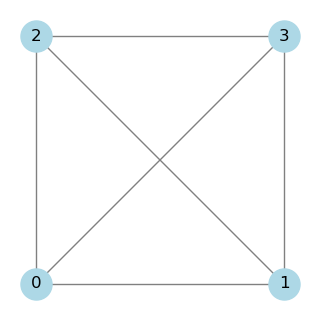

In [4]:
points = np.array([
    [1, 1],
    [2, 1],
    [1, 2],
    [2, 2]
])

""" matrica susjedstva potpuno povezanog grafa """
n = len(points)
A = np.ones((n, n)).astype(int)
# staviti 0 na dijagonali
np.fill_diagonal(A, 0) 
print("Matrica susjedstva:")
print_matrix(A)

""" matrica udaljenosti """

"""graf na temelju matrice susjedstva"""
G = nx.Graph()
for i in range(n):
    G.add_node(i, pos=points[i])
for i in range(n):
    for j in range(i + 1, n):
        if A[i, j] == 1:
            G.add_edge(i, j)

""" vizalizacija grafa """
pos = nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(3, 3))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color="gray", node_size=500)
plt.axis('equal')
plt.show()


matrica sličnosti preko euklidske udaljenosti


Matrica susjedstva:
0 1 1 1
1 0 1 1
1 1 0 1
1 1 1 0
Matrica sličnosti (udaljenosti):
0.00 1.00 1.00 0.71
1.00 0.00 0.71 1.00
1.00 0.71 0.00 1.00
0.71 1.00 1.00 0.00


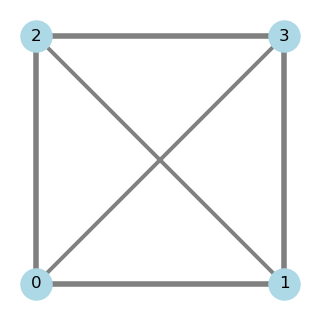

In [5]:
points = np.array([
    [1, 1],
    [2, 1],
    [1, 2],
    [2, 2]
])
n = len(points)

""" # Matrica susjedstva  """
A = np.ones((n, n), dtype=int)
np.fill_diagonal(A, 0)
print("Matrica susjedstva:")
print_matrix(A)

""" Matrica sličnosti  """
D = cdist(points, points, metric='euclidean')
S = np.zeros_like(D)
for i in range(n):
    for j in range(n):
        if i != j:
            S[i, j] = 1 / D[i, j]
print("Matrica sličnosti (udaljenosti):")
print_matrix(S)

""" vizualizacija grafa """
G = nx.Graph()
for i in range(n):
    G.add_node(i, pos=points[i])
for i in range(n):
    for j in range(i + 1, n):
        if A[i, j] == 1:
            similarity = S[i, j]
            G.add_edge(i, j, weight=similarity)

pos = nx.get_node_attributes(G, 'pos')
edge_weights = [G[u][v]['weight'] * 4 for u, v in G.edges()] 
plt.figure(figsize=(3, 3))
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        edge_color="gray", width=edge_weights, node_size=500)
plt.axis('equal')
plt.show()


k-nn matrica susjedstva s 4 najbližih, 10 točaka


Matrica susjedstva:
0 1 1 1 1 1 1 1 1 1
1 0 1 1 1 1 1 1 1 1
1 1 0 1 1 1 1 1 1 1
1 1 1 0 1 1 1 1 1 1
1 1 1 1 0 1 1 1 1 1
1 1 1 1 1 0 1 1 1 1
1 1 1 1 1 1 0 1 1 1
1 1 1 1 1 1 1 0 1 1
1 1 1 1 1 1 1 1 0 1
1 1 1 1 1 1 1 1 1 0
Matrica susjedstva k-NN (k=3):
0 1 1 1 1 1 1 1 1 1
1 0 1 1 1 1 1 1 1 1
1 1 0 1 1 1 1 1 1 1
1 1 1 0 0 0 0 0 0 0
1 1 1 0 0 0 0 0 0 0
1 1 1 0 0 0 0 0 0 0
1 1 1 0 0 0 0 0 0 0
1 1 1 0 0 0 0 0 0 0
1 1 1 0 0 0 0 0 0 0
1 1 1 0 0 0 0 0 0 0
Matrica sličnosti (udaljenosti):
0.00 0.14 0.49 0.19 0.40 0.35 0.19 0.17 0.15 0.10
0.14 0.00 0.18 0.45 0.15 0.11 0.38 0.11 0.18 0.12
0.49 0.18 0.00 0.29 0.54 0.22 0.32 0.18 0.19 0.11
0.19 0.45 0.29 0.00 0.00 0.00 0.00 0.00 0.00 0.00
0.40 0.15 0.54 0.00 0.00 0.00 0.00 0.00 0.00 0.00
0.35 0.11 0.22 0.00 0.00 0.00 0.00 0.00 0.00 0.00
0.19 0.38 0.32 0.00 0.00 0.00 0.00 0.00 0.00 0.00
0.17 0.11 0.18 0.00 0.00 0.00 0.00 0.00 0.00 0.00
0.15 0.18 0.19 0.00 0.00 0.00 0.00 0.00 0.00 0.00
0.10 0.12 0.11 0.00 0.00 0.00 0.00 0.00 0.00 0.00


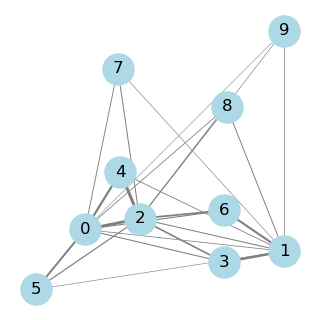

In [6]:
points = np.array([
    [2.5, 2.4],
    [9.8, 1.6],
    [4.5, 2.8],
    [7.6, 1.2],
    [3.8, 4.5],
    [0.7, 0.2],
    [7.6, 3.1],
    [3.7, 8.3],
    [7.7, 6.9],
    [9.8, 9.7]
])

n = len(points)

""" # Matrica susjedstva  """
A = np.ones((n, n), dtype=int)
np.fill_diagonal(A, 0)
print("Matrica susjedstva:")
print_matrix(A)

""" k-nn matrica susjedstva """
k = 3
A_knn = np.zeros_like(A)
for i in range(n):
    knn_indices = np.argsort(A[i])[1:k+1]
    A_knn[i, knn_indices] = 1
A_knn = np.maximum(A_knn, A_knn.T)
print(f"Matrica susjedstva k-NN (k={k}):")
print_matrix(A_knn)


""" Matrica sličnosti  """
D = cdist(points, points, metric='euclidean')
S = np.zeros_like(D)
for i in range(n):
    for j in range(n):
        if i != j:
            S[i, j] = 1 / D[i, j]
S_knn = S * A_knn

print("Matrica sličnosti (udaljenosti):")
print_matrix(S_knn)



""" vizualizacija grafa """
G = nx.Graph()
for i in range(n):
    G.add_node(i, pos=points[i])
for i in range(n):
    for j in range(i + 1, n):
        if A[i, j] == 1:
            similarity = S_knn[i, j]
            G.add_edge(i, j, weight=similarity)

pos = nx.get_node_attributes(G, 'pos')
edge_weights = [G[u][v]['weight'] * 4 for u, v in G.edges()] 
plt.figure(figsize=(3, 3))
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        edge_color="gray", width=edge_weights, node_size=500)
plt.axis('equal')
plt.show()


### 1.3. Optimalni broj skupina


metoda lakta preko SSE -> random data tako da imam 2,3,5 grupe


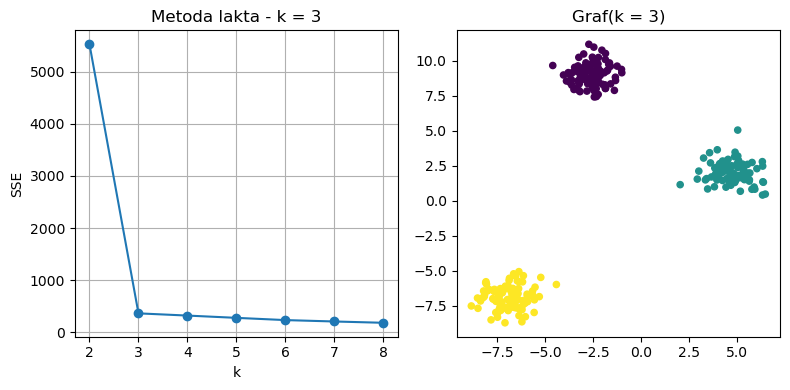

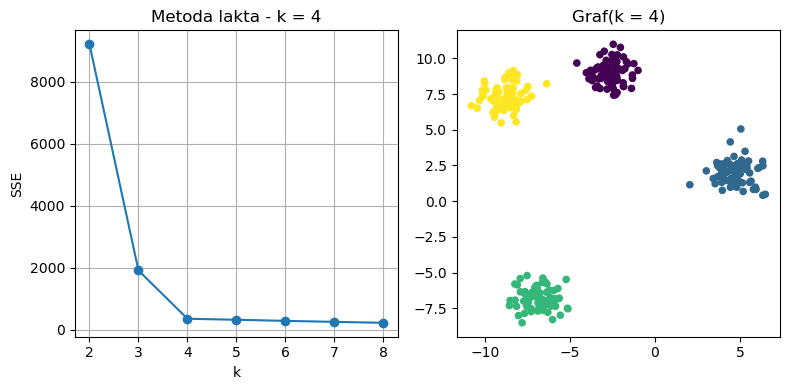

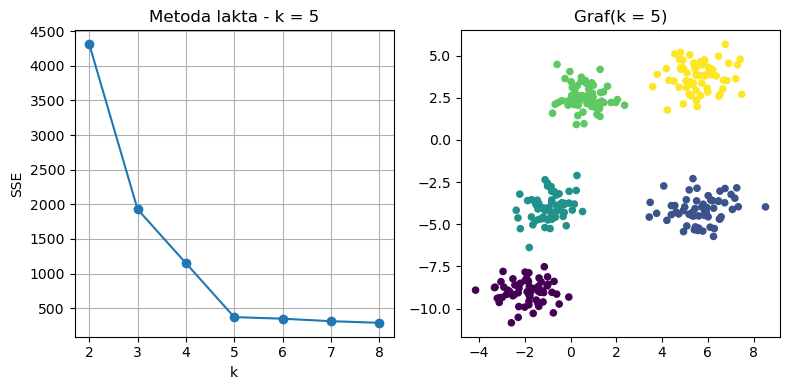

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generiranje podataka
points_3, labels_3 = make_blobs(n_samples=300, centers=3, cluster_std=0.8, random_state=42)
points_4, labels_4 = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=42)
points_5, labels_5 = make_blobs(n_samples=300, centers=5, cluster_std=0.8, random_state=40)

datasets = [
    (points_3, labels_3, 'k = 3'),
    (points_4, labels_4, 'k = 4'),
    (points_5, labels_5, 'k = 5'),
]

k_values = [2, 3, 4, 5, 6, 7, 8]

""" računanje metode lakta  za različite vrijednosti k """
for points, true_labels, title in datasets:
    sse_values = []
    # todo: promijeniti u vlastitu implementaciju k-sredina
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(points)
        sse_values.append(kmeans.inertia_)
    
    fig, axs = plt.subplots(1, 2, figsize=(8,4))

    """ vizalizacija rezultata """
    axs[0].plot(k_values, sse_values, marker='o')
    axs[0].set_xticks(k_values)
    axs[0].set_xlabel('k')
    axs[0].set_ylabel('SSE')
    axs[0].set_title(f'Metoda lakta - {title}')
    axs[0].grid(True)

    scatter = axs[1].scatter(points[:, 0], points[:, 1], c=true_labels, cmap='viridis', s=20)
    axs[1].set_title(f'Graf({title})')

    plt.tight_layout()
    plt.show()


metoda siluete 1) vrijednost siluete za različita grupiranja


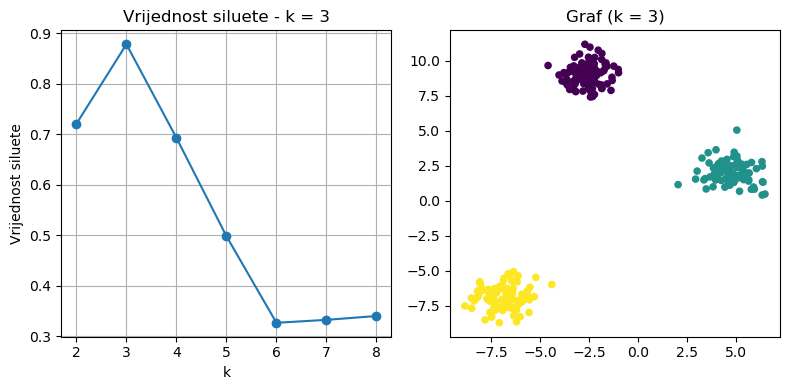

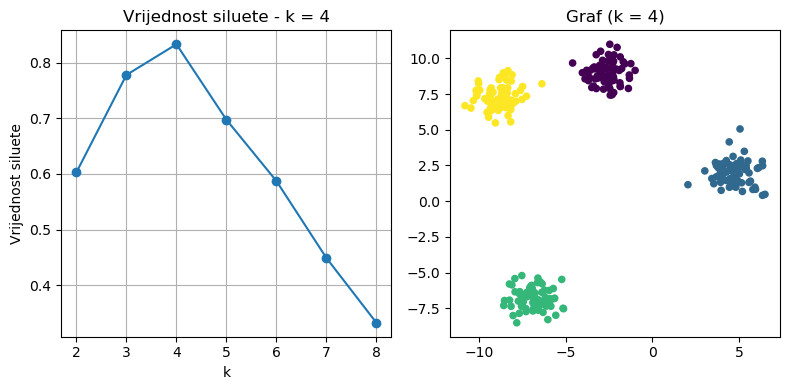

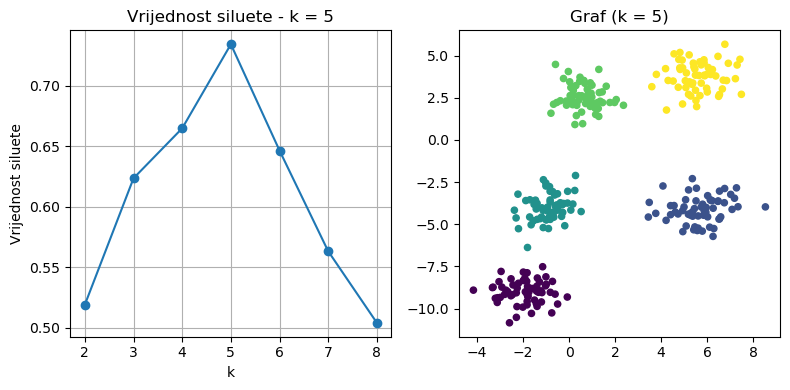

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generiranje podataka
points_3, labels_3 = make_blobs(n_samples=300, centers=3, cluster_std=0.8, random_state=42)
points_4, labels_4 = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=42)
points_5, labels_5 = make_blobs(n_samples=300, centers=5, cluster_std=0.8, random_state=40)

datasets = [
    (points_3, labels_3, 'k = 3'),
    (points_4, labels_4, 'k = 4'),
    (points_5, labels_5, 'k = 5'),
]

k_values = [2, 3, 4, 5, 6, 7, 8]

""" računanje vrijednosti siluete za različite vrijednosti k """
for points, true_labels, title in datasets:
    silhouette_scores = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(points)
        if k > 1:
            score =silhouette_score(points, cluster_labels)
        else:
            score = float('nan')  
        silhouette_scores.append(score)
    
    fig, axs = plt.subplots(1, 2, figsize=(8,4))

    """ vizalizacija rezultata """
    axs[0].plot(k_values, silhouette_scores, marker='o')
    axs[0].set_xticks(k_values)
    axs[0].set_xlabel('k')
    axs[0].set_ylabel('Vrijednost siluete')
    axs[0].set_title(f'Vrijednost siluete - {title}')
    axs[0].grid(True)

    scatter = axs[1].scatter(points[:, 0], points[:, 1], c=true_labels, cmap='viridis', s=20)
    axs[1].set_title(f'Graf ({title})')

    plt.tight_layout()
    plt.show()


metoda siluete 2) vizalni prikaz vrijednosti siluete za svaku točku


Prosječna vrijednost siluete:  0.7734206712655218


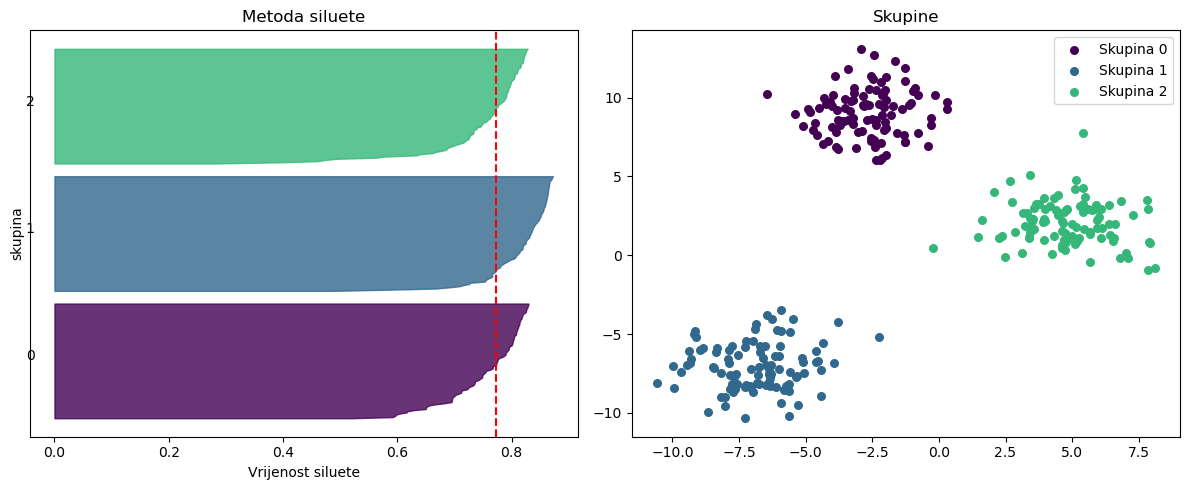

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=1.5, random_state=42)

""" algoritam k-sredina """
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)

""" računanje vrijednosti siluete """
sil_vals = silhouette_samples(X, labels)
avg_score = silhouette_score(X, labels)
print('Prosječna vrijednost siluete: ', avg_score)

# boja
cmap = plt.cm.viridis
colors = [cmap(i / k) for i in range(k)]  

""" vizalizacija rezultata """
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
y_lower = 10
for i in range(k):
    ith_cluster_vals = sil_vals[labels == i]
    ith_cluster_vals.sort()
    size = ith_cluster_vals.shape[0]
    y_upper = y_lower + size

    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_vals,
                      facecolor=colors[i], edgecolor=colors[i], alpha=0.8)
    ax1.text(-0.05, y_lower + 0.5 * size, str(i))
    y_lower = y_upper + 10

ax1.axvline(avg_score, color="red", linestyle="--")
ax1.set_title("Metoda siluete")
ax1.set_xlabel("Vrijenost siluete")
ax1.set_ylabel("skupina")
ax1.set_yticks([])

# boja
for i in range(k):
    ax2.scatter(X[labels == i, 0], X[labels == i, 1], s=30, color=colors[i], label=f'Skupina {i}')
ax2.set_title("Skupine")

ax2.legend()

plt.tight_layout()
plt.show()


## 2. Metode grupiranja


### 2.1. Algoritam k-sredina


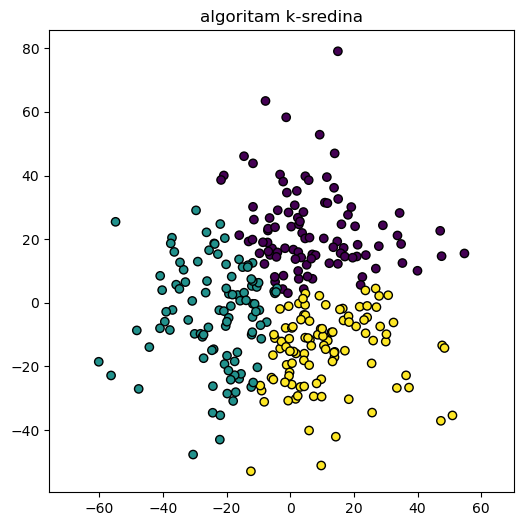

In [10]:
X, y = make_blobs(n_samples=300, centers=3, cluster_std=20, random_state=42)
clusterer = KMeansCustom(data=X,n_clusters = 3)
labels, history=clusterer.pipeline()


plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.title("algoritam k-sredina")
plt.axis('equal')
plt.show()


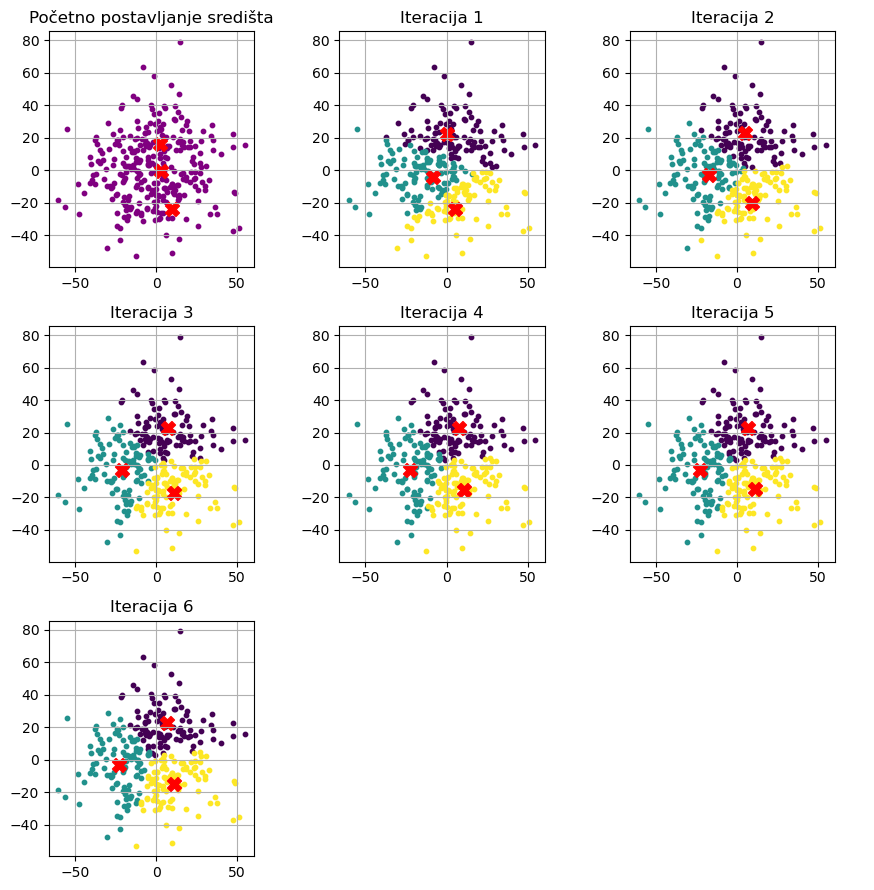

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import math

def plot_kmeans_history_grid(model: KMeansCustom, cols=3):
    n_clusters = model.n_clusters
    colors = cm.get_cmap("viridis", n_clusters)
    total_plots = len(model.cluster_history)
    
    rows = math.ceil(total_plots / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(3 * cols, 3 * rows))
    axes = np.array(axes).reshape(-1) 

    for i in range(len(axes)):
        ax = axes[i]
        if i >= total_plots:
            ax.axis('off') 
            continue

        clusters = model.cluster_history[i]
        centroids = model.centroid_history[i]

        for k in range(n_clusters):
            cluster_points = model.data[np.array(clusters) == k]
            color = "purple" if i == 0 else colors(k)
            ax.scatter(cluster_points[:, 0], cluster_points[:, 1], s=10, color=color, label=f'Skupina {k}')

        ax.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Središta')

        if i == 0:
            ax.set_title("Početno postavljanje središta")
        else:
            ax.set_title(f"Iteracija {i}")

        ax.grid(True)
        ax.set_aspect('equal')

    plt.tight_layout()
    plt.show()

# poziv
plot_kmeans_history_grid(clusterer)


usporedba početnih središta k-means i k-means++ metode

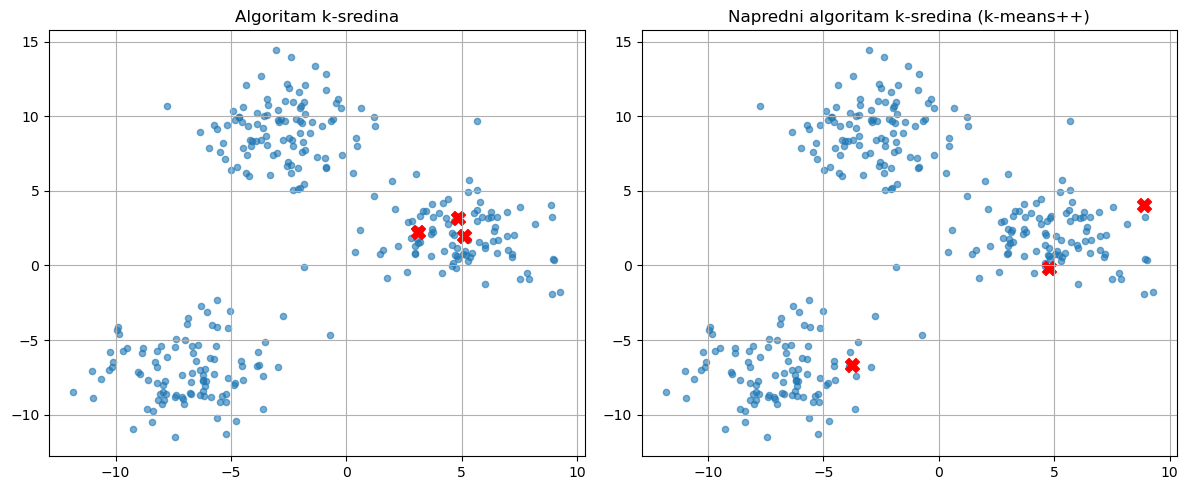

In [12]:
import numpy as np
import matplotlib.pyplot as plt

data, y = make_blobs(n_samples=300, centers=3, cluster_std=2, random_state=42)

kmeans_basic = KMeansCustom(n_clusters=3, data=data)
kmeans_plus_plus = KMeansCustom(n_clusters=3, data=data)

centroids_plus_plus = kmeans_plus_plus.initialize_centroids()
centroids_basic = kmeans_basic.initialize_centroids_basic_algorithm()

# Vizualizacija
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(data[:, 0], data[:, 1], s=20, alpha=0.6)
axs[0].scatter(centroids_basic[:, 0], centroids_basic[:, 1], c='red', s=100, marker='X')
axs[0].set_title("Algoritam k-sredina")
axs[0].grid(True)

axs[1].scatter(data[:, 0], data[:, 1], s=20, alpha=0.6)
axs[1].scatter(centroids_plus_plus[:, 0], centroids_plus_plus[:, 1], c='red', s=100, marker='X')
axs[1].set_title("Napredni algoritam k-sredina (k-means++)")
axs[1].grid(True)

plt.tight_layout()
plt.show()


## 3. Obično spektralno grupiranje


In [13]:
def Laplace_matrix(X):
    """ matrica sličnosti: k-nn sa euklidskom udaljenosti """
    n = X.shape[0]
    A = np.zeros((n, n))
    dists = np.zeros((n, n))
    # euklidska udaljenost
    for i in range(n):
        for j in range(i + 1, n):
            dist = np.sqrt(np.sum((X[i] - X[j]) ** 2))
            dists[i, j] = dist
            dists[j, i] = dist
    # k-nn
    k = 5
    for i in range(n):
        neighbors = np.argsort(dists[i])[1:k+1]
        for j in neighbors:
            A[i][j] = np.exp(-dists[i][j]**2 / 0.1)
            A[j][i] = A[i][j]
    # 0 na glavnoj dijagonali
    np.fill_diagonal(A, 0)

    """ matrica stupnjeva """
    D = np.zeros((n, n))
    for i in range(n):
        D[i, i] = np.sum(A[i])

    """ Laplaceova matrica """
    L = D - A
    return A, D, L


def Laplace_matrix_from_A(A):
    n = A.shape[0]
    """ matrica stupnjeva """
    D = np.zeros((n, n))
    for i in range(n):
        D[i, i] = np.sum(A[i])

    """ Laplaceova matrica """
    L = D - A
    return L

def normalized_Laplace_matrix(A):
    n = A.shape[0]
    """ matrica stupnjeva """
    D = np.zeros((n, n))
    for i in range(n):
        D[i, i] = np.sum(A[i])

    """ Laplaceova matrica """
    L = D - A
    
    D_inv_sqrt = np.diag(1.0 / np.sqrt(np.diag(D)))  # D^(-1/2)
    L = D_inv_sqrt @ L @ D_inv_sqrt 
    return L

def fiedler_vector_clusters(L):
    eigvals, eigvecs = np.linalg.eig(L)
    idx = eigvals.argsort()
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]
    fiedler_vector = eigvecs[:, 1]
    clusters = np.where(fiedler_vector >= 0, 1, 0)
    return eigvals, eigvecs, fiedler_vector, clusters

primjer dobivanja Fiedlerovog vektora na setu od 10 točaka


Matrica susjedstva:
0.00 0.14 0.14 0.02 0.37 0.00 0.00 0.00 0.00 0.00
0.14 0.00 0.02 0.14 0.37 0.14 0.00 0.02 0.00 0.01
0.14 0.02 0.00 0.14 0.37 0.00 0.00 0.00 0.00 0.00
0.02 0.14 0.14 0.00 0.37 0.02 0.00 0.14 0.00 0.01
0.37 0.37 0.37 0.37 0.00 0.01 0.00 0.01 0.00 0.00
0.00 0.14 0.00 0.02 0.01 0.00 0.14 0.14 0.02 0.37
0.00 0.00 0.00 0.00 0.00 0.14 0.00 0.02 0.14 0.37
0.00 0.02 0.00 0.14 0.01 0.14 0.02 0.00 0.14 0.37
0.00 0.00 0.00 0.00 0.00 0.02 0.14 0.14 0.00 0.37
0.00 0.01 0.00 0.01 0.00 0.37 0.37 0.37 0.37 0.00


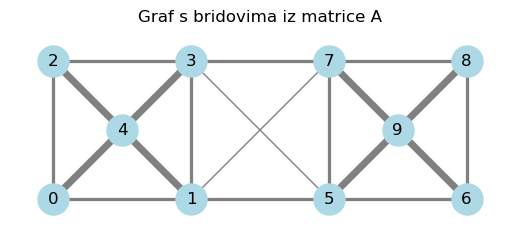

Laplaceova matrica:
 0.66 -0.14 -0.14 -0.02 -0.37 -0.00 -0.00 -0.00 -0.00 -0.00
-0.14  0.82 -0.02 -0.14 -0.37 -0.14 -0.00 -0.02 -0.00 -0.01
-0.14 -0.02  0.66 -0.14 -0.37 -0.00 -0.00 -0.00 -0.00 -0.00
-0.02 -0.14 -0.14  0.82 -0.37 -0.02 -0.00 -0.14 -0.00 -0.01
-0.37 -0.37 -0.37 -0.37  1.49 -0.01 -0.00 -0.01 -0.00 -0.00
-0.00 -0.14 -0.00 -0.02 -0.01  0.82 -0.14 -0.14 -0.02 -0.37
-0.00 -0.00 -0.00 -0.00 -0.00 -0.14  0.66 -0.02 -0.14 -0.37
-0.00 -0.02 -0.00 -0.14 -0.01 -0.14 -0.02  0.82 -0.14 -0.37
-0.00 -0.00 -0.00 -0.00 -0.00 -0.02 -0.14 -0.14  0.66 -0.37
-0.00 -0.01 -0.00 -0.01 -0.00 -0.37 -0.37 -0.37 -0.37  1.49
Svojstvene vrijednosti:
 [0.   0.11 0.68 0.69 0.75 0.86 0.93 1.11 1.86 1.88]
Svojstveni vektori:
 [[-0.32  0.37  0.35  0.38 -0.47 -0.3   0.32 -0.17  0.16 -0.15]
 [-0.32  0.24 -0.35  0.32 -0.17  0.39 -0.38  0.47  0.16 -0.19]
 [-0.32  0.37  0.35 -0.38  0.47 -0.3  -0.32  0.17  0.16 -0.15]
 [-0.32  0.24 -0.35 -0.32  0.17  0.39  0.38 -0.47  0.16 -0.19]
 [-0.32  0.32 -0.   -0.   -0. 

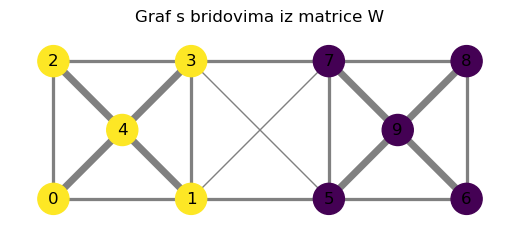

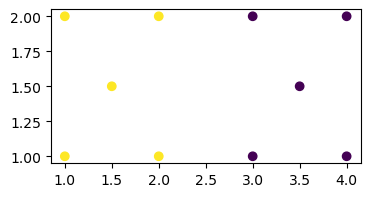

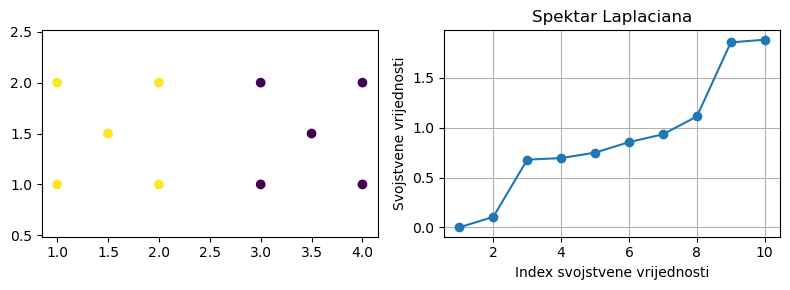

In [14]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

""" set of 10 točaka """
points = np.array([
    [1, 1], [2, 1], [1, 2], [2, 2], [1.5, 1.5],
    [3, 1], [4, 1], [3, 2], [4, 2], [3.5, 1.5]
])

""" matrica sličnosti prema Gaussovoj jezgrenoj funkciji """
n = len(points)
distances = squareform(pdist(points))
sigma = 0.5
A = np.exp(-distances**2 / (2 * sigma**2))
np.fill_diagonal(A, 0)

print('Matrica susjedstva:')
print_matrix(A)

""" graf prema matrici sličnosti A """
G = nx.Graph()
for i in range(n):
    G.add_node(i, pos=points[i])
for i in range(n):
    for j in range(i + 1, n):
        # dodavanje bridova samo ako imaju težinu """
        if A[i, j] > 0.01:
            G.add_edge(i, j, weight=A[i, j])

""" vizalizacija težina bridova """
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]
min_width, max_width = 1, 5
min_w, max_w = min(weights), max(weights)
edge_widths = [min_width + (w - min_w) / (max_w - min_w)
               * (max_width - min_width) for w in weights]
pos = nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(5, 2))
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        edge_color='gray', width=edge_widths, node_size=500)
plt.title("Graf s bridovima iz matrice A")
plt.axis('equal')
plt.show()

""" svojstvene vrijednosti i svojstveni vektori """
L = Laplace_matrix_from_A(A)
print('Laplaceova matrica:')
print_matrix(L)

""" računanje svojstvenih vrijednosti i svojstvenih vektora """
eigvals, eigvecs, fiedler_vector, clusters = fiedler_vector_clusters(L)
print('Svojstvene vrijednosti:\n', np.round(eigvals, 2))
print('Svojstveni vektori:\n', np.round(eigvecs, 2))
print('Fiedlerov vektor:\n', np.round(eigvecs[:, 1], 2))


# opcija 1
""" Vizualizacija grupiranja """
cmap = plt.get_cmap('viridis')
n_clusters = len(set(clusters))
norm = mcolors.Normalize(vmin=0, vmax=n_clusters - 1)
node_colors = [cmap(norm(clusters[i])) for i in range(len(clusters))]


plt.figure(figsize=(5, 2))
nx.draw(G, pos, with_labels=True, node_color=node_colors,
        edge_color='gray', width=edge_widths, node_size=500)
plt.title("Graf s bridovima iz matrice W")
plt.axis('equal')
plt.show()

# opcija 2
""" Vizualizacija grupiranja """
plt.figure(figsize=(4, 2))
plt.scatter(points[:, 0], points[:, 1], c=clusters, cmap="viridis")
plt.show()


fig, axs = plt.subplots(1, 2, figsize=(8, 3))

axs[0].scatter(points[:, 0], points[:, 1], c=clusters, cmap='viridis')
axs[0].axis('equal')

axs[1].plot(np.arange(1, len(eigvals)+1), eigvals, 'o-')
axs[1].set_title('Spektar Laplaciana')
axs[1].set_xlabel('Index svojstvene vrijednosti')
axs[1].set_ylabel('Svojstvene vrijednosti')
axs[1].grid(True)

plt.tight_layout()
plt.show()


Laplaceova vs normalizirana laplaceova matrica

Matrica susjedstva:
0.00 0.00 0.59 0.03 0.47
0.00 0.00 0.02 0.54 0.00
0.59 0.02 0.00 0.22 0.66
0.03 0.54 0.22 0.00 0.04
0.47 0.00 0.66 0.04 0.00


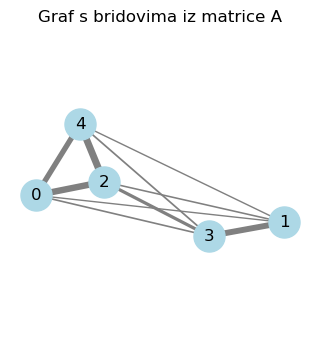

Laplaceova matrica:
 1.09 -0.00 -0.59 -0.03 -0.47
-0.00  0.57 -0.02 -0.54 -0.00
-0.59 -0.02  1.49 -0.22 -0.66
-0.03 -0.54 -0.22  0.83 -0.04
-0.47 -0.00 -0.66 -0.04  1.17
Svojstvene vrijednosti:
 [0.   0.23 1.24 1.59 2.08]
Svojstveni vektori:
 [[ 0.45  0.4  -0.14  0.74 -0.29]
 [ 0.45 -0.65 -0.61 -0.02  0.04]
 [ 0.45  0.3   0.06 -0.09  0.84]
 [ 0.45 -0.43  0.77  0.05 -0.14]
 [ 0.45  0.38 -0.09 -0.67 -0.45]]
Fiedlerov vektor:
 [ 0.4  -0.65  0.3  -0.43  0.38]
Normalizirana Laplaceova matrica:
 1.00 -0.00 -0.47 -0.03 -0.41
-0.00  1.00 -0.03 -0.78 -0.00
-0.47 -0.03  1.00 -0.20 -0.50
-0.03 -0.78 -0.20  1.00 -0.04
-0.41 -0.00 -0.50 -0.04  1.00
Svojstvene vrijednosti:
 [0.   0.29 1.41 1.5  1.81]
Svojstveni vektori:
 [[ 0.46  0.32 -0.78  0.26  0.07]
 [ 0.33 -0.62 -0.05  0.22 -0.67]
 [ 0.54  0.25  0.15 -0.75 -0.23]
 [ 0.4  -0.58  0.02 -0.12  0.7 ]
 [ 0.48  0.32  0.6   0.55  0.08]]
Fiedlerov vektor:
 [ 0.32 -0.62  0.25 -0.58  0.32]


In [15]:
""" set of 10 točaka """
points = np.array([
    [2.5, 2.4],
    [9.8, 1.6],
    [4.5, 2.8],
    [7.6, 1.2],
    [3.8, 4.5],

])


""" matrica sličnosti prema Gaussovoj jezgrenoj funkciji """
n = len(points)
distances = squareform(pdist(points))
sigma = 2
A = np.exp(-distances**2 / (2 * sigma**2))
np.fill_diagonal(A, 0)
print('Matrica susjedstva:')
print_matrix(A) 

""" graf prema matrici sličnosti W """
G = nx.Graph()
for i in range(n):
    G.add_node(i, pos=points[i])
for i in range(n):
    for j in range(i + 1, n):
        # dodavanje bridova samo ako imaju težinu """
        G.add_edge(i, j, weight=A[i, j])

""" vizalizacija težina bridova """
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]
min_width, max_width = 1, 5
min_w, max_w = min(weights), max(weights)
edge_widths = [min_width + (w - min_w) / (max_w - min_w)
               * (max_width - min_width) for w in weights]
pos = nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(3,3))
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        edge_color='gray', width=edge_widths, node_size=500)
plt.title("Graf s bridovima iz matrice A")
plt.axis('equal')
plt.show()

""" Laplaceove matrice """
L = Laplace_matrix_from_A(A)
L_norm = normalized_Laplace_matrix(A)
print('Laplaceova matrica:')
print_matrix(L)
eigvals, eigvecs, fiedler_vector, clusters = fiedler_vector_clusters(L)
print('Svojstvene vrijednosti:\n', np.round(eigvals, 2))
print('Svojstveni vektori:\n', np.round(eigvecs, 2))
print('Fiedlerov vektor:\n', np.round(eigvecs[:, 1], 2))
print('Normalizirana Laplaceova matrica:')  
print_matrix(L_norm)
eigvals, eigvecs, fiedler_vector, clusters = fiedler_vector_clusters(L_norm)
print('Svojstvene vrijednosti:\n', np.round(eigvals, 2))
print('Svojstveni vektori:\n', np.round(eigvecs, 2))
print('Fiedlerov vektor:\n', np.round(eigvecs[:, 1], 2))


ovisnost metode o matrici sličnosti, to jest odabiru parametra sigma_x u Gaussovoj jezgrenoj funkciji

In [16]:
""" dodatne formule za iris set podataka """
def compute_similarity_matrix_2d_gauss(data, sigma_X):
    n = len(data)
    A = np.zeros((n, n))
    distances = squareform(pdist(data))
    A = np.exp(-distances**2 / (2 * sigma_X**2))
    for i in range(n):
        for j in range(i + 1, n):
            dist_sq = np.linalg.norm(data[i] - data[j]) ** 2
            w_ij = np.exp(-dist_sq / (2 * sigma_X ** 2))
            A[i, j] = w_ij
            A[j, i] = w_ij
    np.fill_diagonal(A, 0)
    return A

def compute_laplacian_normalized(W):
        D = np.diag(np.sum(W, axis=1))
        D_inv_sqrt = np.diag([1.0 / np.sqrt(d) if d != 0 else 0 for d in np.diag(D)]) # D^1/2
        L = D_inv_sqrt @ (D - W) @ D_inv_sqrt
        return L

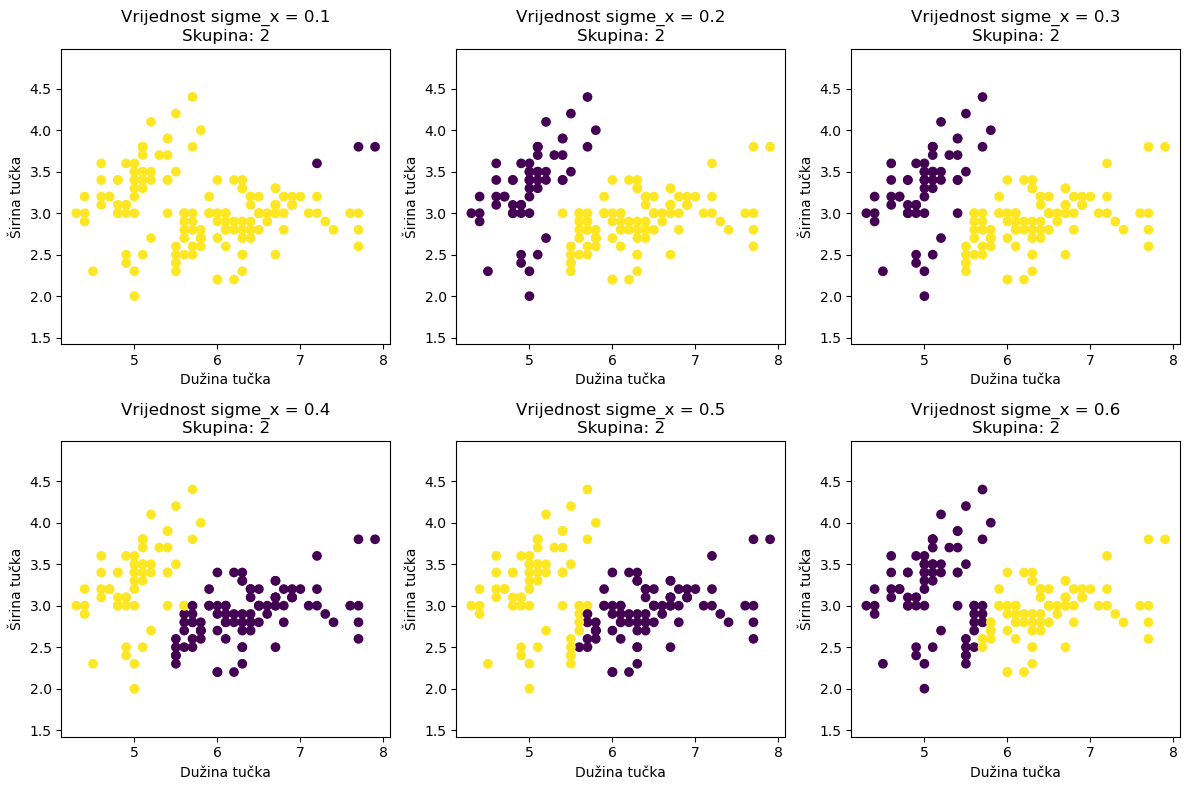

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, :2]  # sepal length i width

sigma_x_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

n_cols = 3
n_rows = 2
plt.figure(figsize=(4 * n_cols, 4 * n_rows))

def spektralno_grupiranje(points, sigma):
    n = len(points)
    A = compute_similarity_matrix_2d_gauss(points, sigma)
    np.fill_diagonal(A, 0)
    L = compute_laplacian_normalized(A)
    eigvals, eigvecs, fiedler_vector, clusters = fiedler_vector_clusters(L)
    return eigvals, eigvecs, fiedler_vector, clusters


current_num_of_clusters = 0
for i, sigma_x in enumerate(sigma_x_values):
    eigvals, _, _, clusters = spektralno_grupiranje(X, sigma_x)
    plt.subplot(n_rows, n_cols, i+1)
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
    plt.title(f'Vrijednost sigme_x = {np.round(sigma_x,2)}\nSkupina: {len(np.unique(clusters))}')
    plt.xlabel('Dužina tučka')
    plt.ylabel('Širina tučka')
    plt.axis('equal')

plt.tight_layout()
plt.show()




usporedna uspješnosti spektralnog i k-sredina

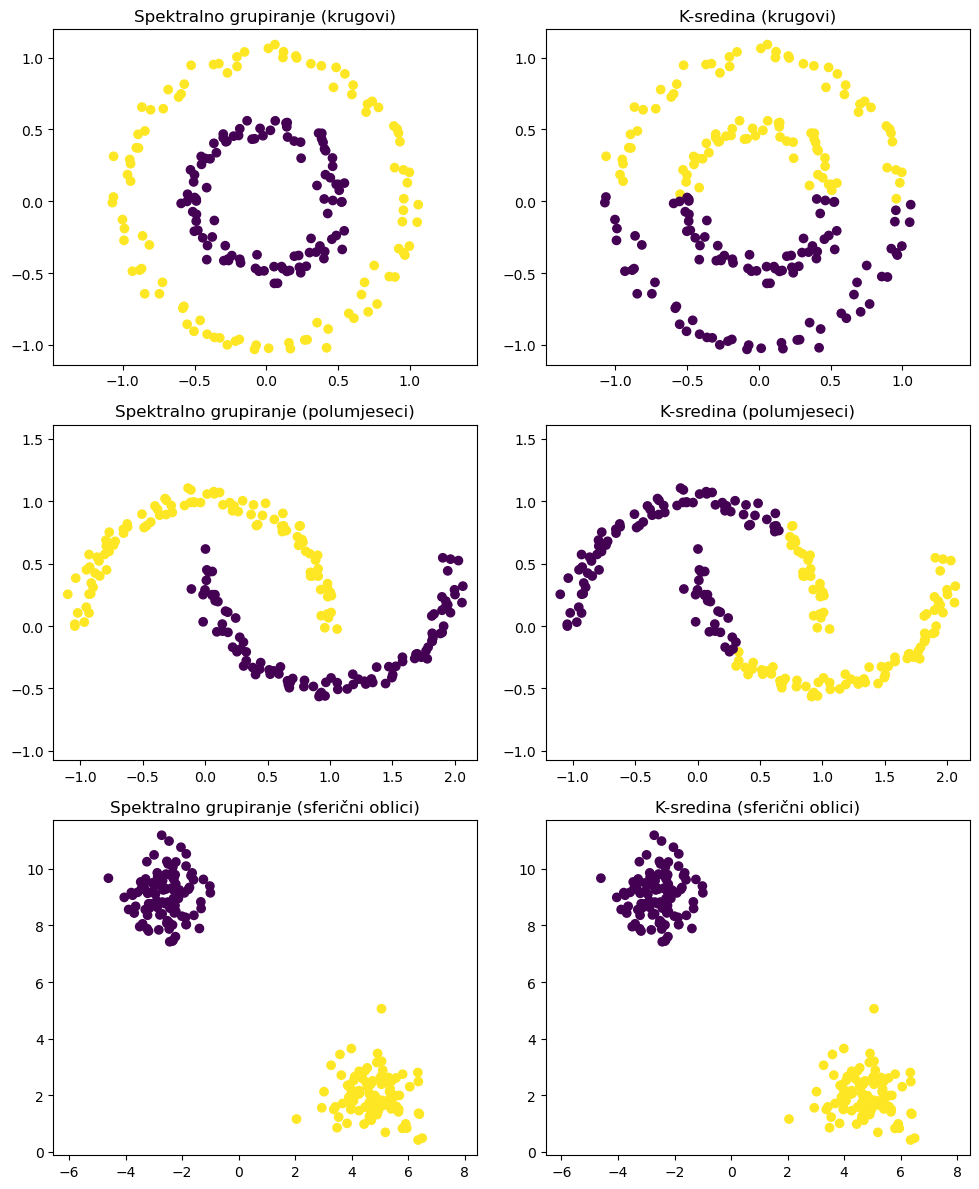

In [18]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons

X1, _ = make_circles(n_samples=200, factor=0.5, noise=0.05, random_state=42)
eigvals1, _, _, clusters1 = spektralno_grupiranje(X1, 0.1)
clusterer1 = KMeansCustom(data=X1, n_clusters=2)
labels1, _ = clusterer1.pipeline()

X2, _ = make_moons(n_samples=200, noise=0.05, random_state=42)
eigvals2, _, _, clusters2 = spektralno_grupiranje(X2, 0.1)
clusterer2 = KMeansCustom(data=X2, n_clusters=2)
labels2, _ = clusterer2.pipeline()

X3, _ = make_blobs(n_samples=200, centers=2, cluster_std=0.80, random_state=42)
eigvals3, _, _, clusters3 = spektralno_grupiranje(X3, 0.1)
clusterer3 = KMeansCustom(data=X3, n_clusters=2)
labels3, _ = clusterer3.pipeline()


plt.figure(figsize=(10, 12))

plt.subplot(3, 2, 1)
plt.scatter(X1[:, 0], X1[:, 1], c=clusters1, cmap='viridis')
plt.title("Spektralno grupiranje (krugovi)")
plt.axis('equal')

plt.subplot(3, 2, 2)
plt.scatter(X1[:, 0], X1[:, 1], c=labels1, cmap='viridis')
plt.title("K-sredina (krugovi)")
plt.axis('equal')

plt.subplot(3, 2, 3)
plt.scatter(X2[:, 0], X2[:, 1], c=clusters2, cmap='viridis')
plt.title("Spektralno grupiranje (polumjeseci)")
plt.axis('equal')

plt.subplot(3, 2, 4)
plt.scatter(X2[:, 0], X2[:, 1], c=labels2, cmap='viridis')
plt.title("K-sredina (polumjeseci)")
plt.axis('equal')

plt.subplot(3, 2, 5)
plt.scatter(X3[:, 0], X3[:, 1], c=clusters3, cmap='viridis')
plt.title("Spektralno grupiranje (sferični oblici)")
plt.axis('equal')

plt.subplot(3, 2, 6)
plt.scatter(X3[:, 0], X3[:, 1], c=labels3, cmap='viridis')
plt.title("K-sredina (sferični oblici)")
plt.axis('equal')

plt.tight_layout()
plt.show()


razlika između normalizirane laplaceove matrice i ne neorm. laplaceove matrice

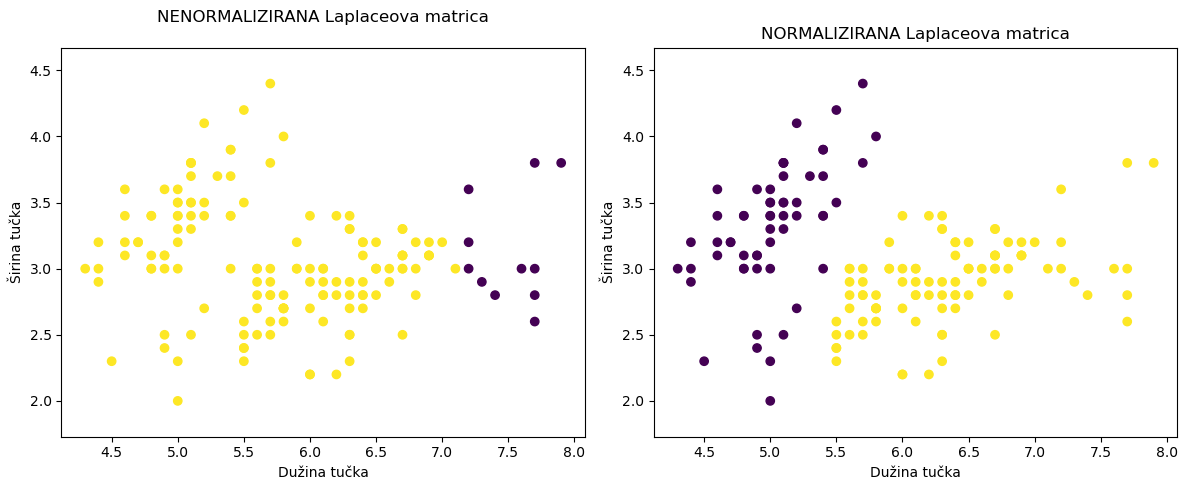

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, :2]  

def spektralno_grupiranje_2(points, sigma, normalized):
    A = compute_similarity_matrix_2d_gauss(points, sigma)
    np.fill_diagonal(A, 0)
    if normalized:
        L = compute_laplacian_normalized(A)
    else:
        L = Laplace_matrix_from_A(A)
    eigvals, eigvecs, fiedler_vector, clusters = fiedler_vector_clusters(L)
    return eigvals, eigvecs, fiedler_vector, clusters

plt.figure(figsize=(12, 5))

# Nenormalizirana Laplaceova matrica
eigvals, _, _, clusters = spektralno_grupiranje_2(X, 0.3, False)
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.title(f'NENORMALIZIRANA Laplaceova matrica\n')
plt.xlabel('Dužina tučka')
plt.ylabel('Širina tučka')
plt.axis('equal')

# Normalizirana Laplaceova matrica
eigvals, _, _, clusters = spektralno_grupiranje_2(X, 0.3, True)
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.title(f'NORMALIZIRANA Laplaceova matrica')
plt.xlabel('Dužina tučka')
plt.ylabel('Širina tučka')
plt.axis('equal')

plt.tight_layout()
plt.show()


### 3.1. Metoda normaliziranog reza


In [20]:
#sm
import SMAlgorithm
importlib.reload(SMAlgorithm)
SpectralClusteringSM = SMAlgorithm.SpectralClusteringSM


primjer Fiedlerovog vektora na set u 10 točaka

Početni sortirani podatci prema Fiedlerovom vektoru: [9 6 8 7 5 1 3 0 2 4]
Fiedlerov vektor iteracija 0.: [ 0.315  0.233  0.315  0.233  0.44  -0.233 -0.315 -0.233 -0.315 -0.44 ]
Vrijednost norm.reza 0.: [1.201 0.866 0.552 0.388 0.152 0.388 0.552 0.866 1.201]
Fiedlerov vektor iteracija 1.: [-0.     0.034  0.706 -0.034 -0.706]
Vrijednost norm.reza 1.: [1.191 1.168 1.168 1.191]
Fiedlerov vektor iteracija 2.: [-0.137 -0.694  0.694  0.137 -0.   ]
Vrijednost norm.reza 2.: [1.191 1.168 1.168 1.191]
Pozicija: min vrijednost norm. reza => {5: 0.15157334516355753}


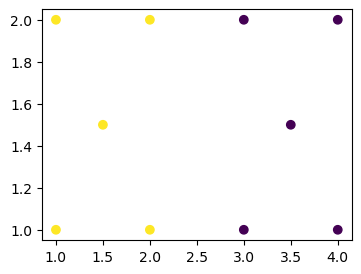

In [21]:

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

X = np.array([
    [1, 1], [2, 1], [1, 2], [2, 2], [1.5, 1.5],
    [3, 1], [4, 1], [3, 2], [4, 2], [3.5, 1.5]
])
model = SpectralClusteringSM(
        sigma_X=0.5,              
        ncut_max=0.2
    )
clusters = model.segment_2d(X)

print('Početni sortirani podatci prema Fiedlerovom vektoru:', model.sorted_indexes[0])
for i, (vec, n_cut) in enumerate(zip(model.fiedler_vectors, model.all_ncut_values)):
    rounded_vec = np.round(vec, 3)
    print(f"Fiedlerov vektor iteracija {i}.: {rounded_vec}")
    n_cut_rounded = np.round(n_cut, 3)
    print(f"Vrijednost norm.reza {i}.: {n_cut_rounded}")
for i, split in enumerate(model.splits):
    rounded_vec = np.round(vec, 3)
    print(f"Pozicija: min vrijednost norm. reza => {split}")
plt.figure(figsize=(4, 3))
plt.scatter(X[:, 0], X[:, 1], c=clusters) 
plt.show()

primjer na kojem vidimo kako se mijenja vrijednost normaliziranog reza: više vrijednosti između točaka kod kojih grupiranje ne bi bilo idealno, niže vrijednosti između točaka koje se dobro grupiraju (nepotrebno?)

Točka 1: [2.5 2.4]
Točka 2: [9.8 1.6]
Točka 3: [4.5 2.8]
Točka 4: [7.6 1.2]
Točka 5: [3.8 4.5]
Početni sortirani podatci prema Fiedlerovom vektoru: [1 3 0 4 2]
iteracija:  0
Pozicija: min vrijednost norm. reza => [1.0158679373932045, 3.054716295901201e-07, 0.8293417660664183, 1.932924306166935]
iteracija:  1
Pozicija: min vrijednost norm. reza => [2.0]
iteracija:  2
Pozicija: min vrijednost norm. reza => [1.7049917782306425, 1.096851624321809]


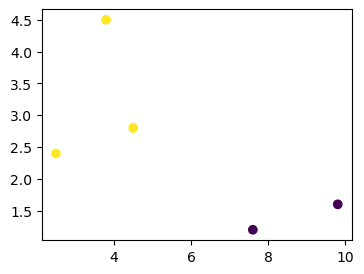

In [22]:
#points = np.random.uniform(low=0.0, high=10.0, size=(20, 2))

points = np.array([
    [2.5, 2.4],
    [9.8, 1.6],
    [4.5, 2.8],
    [7.6, 1.2],
    [3.8, 4.5],

])
model = SpectralClusteringSM(
        sigma_X=0.5,    
        ncut_max=0.1
    )
clusters = model.segment_2d(points)

for i, d in enumerate(points):
    print(f"Točka {i+1}: {d}")
print('Početni sortirani podatci prema Fiedlerovom vektoru:', model.sorted_indexes[0])
for i, n_cut in enumerate(model.all_ncut_values):
    rounded_vec = np.round(vec, 3)
    print('iteracija: ', i)
    print(f"Pozicija: min vrijednost norm. reza => {n_cut}")
plt.figure(figsize=(4, 3))
plt.scatter(points[:, 0], points[:, 1], c=clusters) 
plt.show()


primjer u kojem vidimo kako vrijednost normaliziranog reza utječe na grupiranje

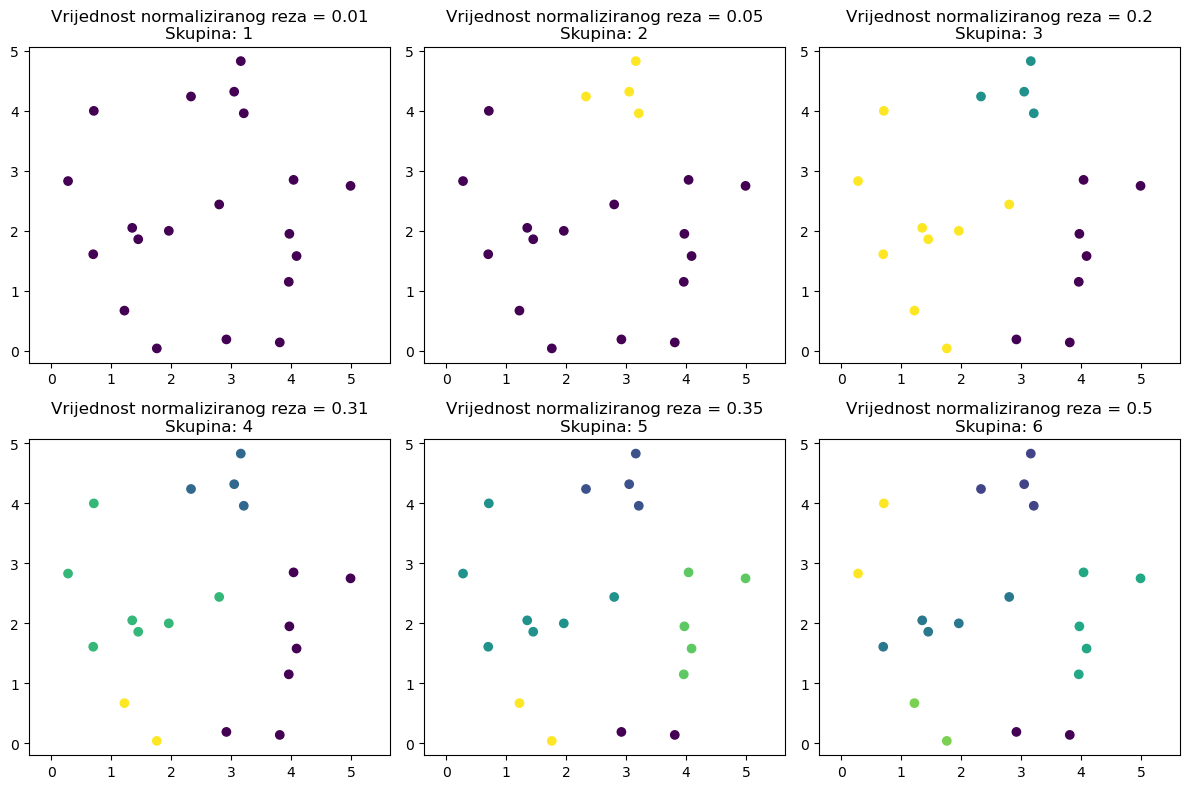

In [23]:
import numpy as np
import matplotlib.pyplot as plt

points = np.array([[3.97, 1.95],[2.33, 4.24],[2.92, 0.19],[1.45, 1.86],[4.04, 2.85],[1.96, 2.  ],[1.35, 2.05],[2.8,  2.44],
                   [4.99, 2.75],[3.81, 0.14],[3.96, 1.15],[1.76, 0.04],[3.21, 3.96],[3.05, 4.32],[0.28, 2.83],
                   [4.09, 1.58],[0.71, 4.  ],[0.7,  1.61],[1.22, 0.67],[3.16, 4.83]])

ncut_values = [0.01, 0.05, 0.2, 0.31 , 0.35, 0.5]

n_cols = 3
n_rows = 2
plt.figure(figsize=(4 * n_cols, 4 * n_rows))

for i, ncut in enumerate(ncut_values):
    model = SpectralClusteringSM(
        sigma_X=0.5,
        ncut_max=ncut
    )
    clusters = model.segment_2d(points)

    plt.subplot(n_rows, n_cols, i+1)
    plt.scatter(points[:, 0], points[:, 1], c=clusters, cmap='viridis')
    plt.title(f'Vrijednost normaliziranog reza = {np.round(ncut,2)}\nSkupina: {len(np.unique(clusters))}')
    plt.axis('equal')

plt.tight_layout()
plt.show()


primjer s iris setom podataka -> promjena grupiranja ovisno o vrijednosti normaliziranog reza

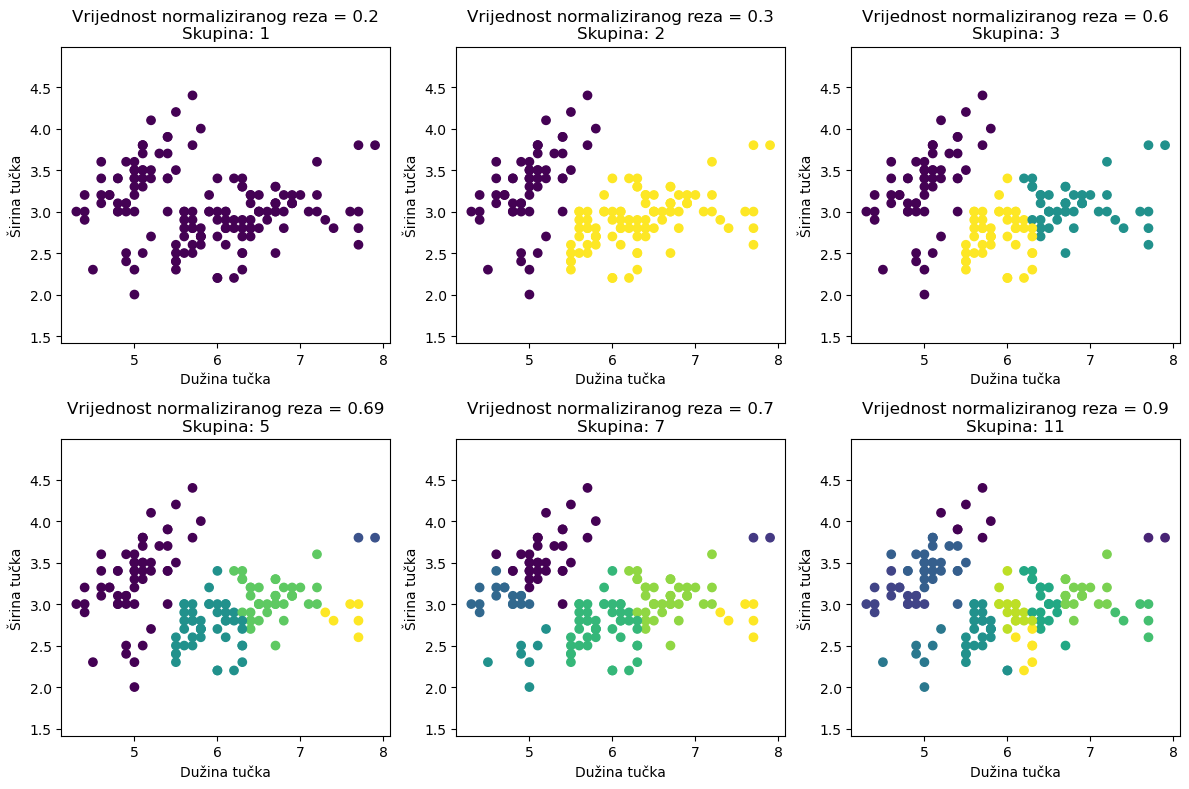

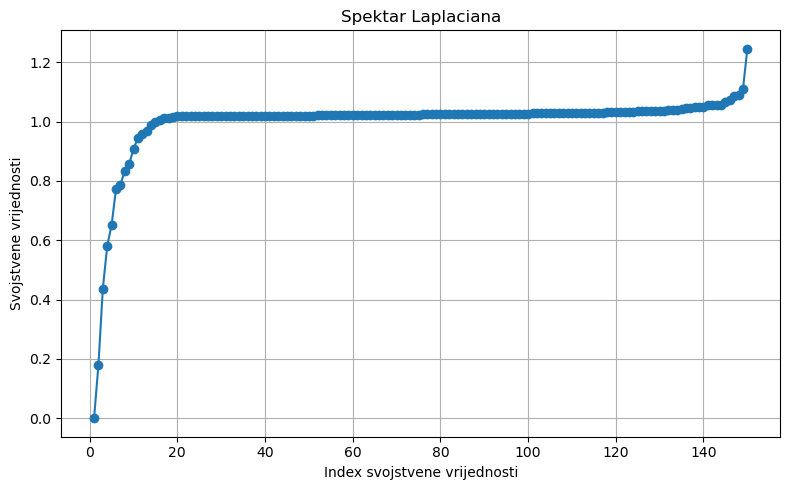

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

import SMAlgorithm
importlib.reload(SMAlgorithm)
SpectralClusteringSM = SMAlgorithm.SpectralClusteringSM

# Učitaj iris dataset
iris = load_iris()
X = iris.data[:, :2]  # sepal length i width

ncut_values = [0.2, 0.3, 0.6, 0.687, 0.7, 0.9]

n_cols = 3
n_rows = 2
plt.figure(figsize=(4 * n_cols, 4 * n_rows))

current_num_of_clusters = 0
for i, ncut in enumerate(ncut_values):
    model = SpectralClusteringSM(
        sigma_X=0.5,
        ncut_max=ncut
    )
    clusters = model.segment_2d(X)

    plt.subplot(n_rows, n_cols, i+1)
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
    plt.title(f'Vrijednost normaliziranog reza = {np.round(ncut,2)}\nSkupina: {len(np.unique(clusters))}')
    plt.xlabel('Dužina tučka')
    plt.ylabel('Širina tučka')
    plt.axis('equal')

plt.tight_layout()
plt.show()


plt.figure(figsize=(8,5))
plt.plot(np.arange(1, len(model.all_eigenvals[0])+1), model.all_eigenvals[0], 'o-')
plt.title('Spektar Laplaciana')
plt.xlabel('Index svojstvene vrijednosti')
plt.ylabel('Svojstvene vrijednosti')
plt.grid(True)
plt.tight_layout()
plt.show()


### 3.2. NWJ metoda


In [25]:
#njw
import NJWAlgorithm
importlib.reload(NJWAlgorithm)
SpectralClusteringNJW = NJWAlgorithm.SpectralClusteringNJW

Primjer s 10 točkama + matrica 

Broj skupina: 2
Svojstveni vektori (u stupcima): 
-0.27  0.31  0.34  0.25  0.40 -0.34  0.43 -0.29 -0.25 -0.19
-0.30  0.23 -0.36  0.43  0.29  0.36 -0.25  0.40 -0.16 -0.25
-0.27  0.31  0.34 -0.25 -0.40 -0.34 -0.43  0.29 -0.25 -0.19
-0.30  0.23 -0.36 -0.43 -0.29  0.36  0.25 -0.40 -0.16 -0.25
-0.41  0.44  0.09 -0.00  0.00  0.10  0.00  0.00  0.57  0.55
-0.30 -0.23 -0.36  0.43 -0.29 -0.36 -0.25 -0.40 -0.16  0.25
-0.27 -0.31  0.34  0.25 -0.40  0.34  0.43  0.29 -0.25  0.19
-0.30 -0.23 -0.36 -0.43  0.29 -0.36  0.25  0.40 -0.16  0.25
-0.27 -0.31  0.34 -0.25  0.40  0.34 -0.43 -0.29 -0.25  0.19
-0.41 -0.44  0.09 -0.00 -0.00 -0.10 -0.00 -0.00  0.57 -0.55
X matrica:
-0.27  0.31
-0.30  0.23
-0.27  0.31
-0.30  0.23
-0.41  0.44
-0.30 -0.23
-0.27 -0.31
-0.30 -0.23
-0.27 -0.31
-0.41 -0.44
Y matrica:
-0.65  0.76
-0.79  0.61
-0.65  0.76
-0.79  0.61
-0.68  0.73
-0.79 -0.61
-0.65 -0.76
-0.79 -0.61
-0.65 -0.76
-0.68 -0.73


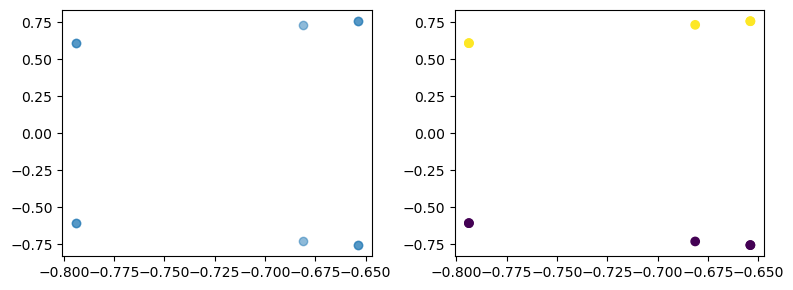

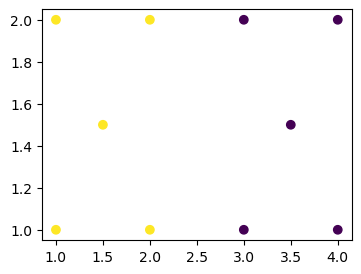

In [26]:
""" set of 10 točaka """
points = np.array([
    [1, 1], [2, 1], [1, 2], [2, 2], [1.5, 1.5],
    [3, 1], [4, 1], [3, 2], [4, 2], [3.5, 1.5]
])
sc = SpectralClusteringNJW(sigma_X=0.5, max_clusters=2)
clusters_sc = sc.segment_2d(points)

print('Broj skupina:', sc.max_clusters)
print('Svojstveni vektori (u stupcima): ')
print_matrix(sc.eigvecs)
print('X matrica:')
print_matrix(sc.X)
print('Y matrica:')
print_matrix(sc.Y)

plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
plt.scatter(sc.Y[:, 0], sc.Y[:, 1], alpha=0.5)

plt.subplot(1, 2, 2)
plt.scatter(sc.Y[:, 0], sc.Y[:, 1], c=clusters_sc)

plt.tight_layout()
plt.show()

""" vizualizacija rezultata """
plt.figure(figsize=(4, 3))
plt.scatter(points[:, 0], points[:, 1], c=clusters_sc) 
plt.show()

Primjer zašto ne koristimo samo algoritam k-sredina

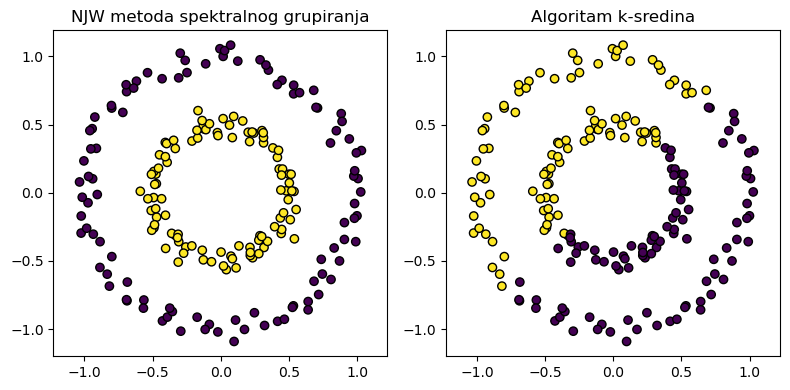

In [27]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

""" podatci: koncentrični krugovi """
X, _ = make_circles(n_samples=200, factor=0.5, noise=0.05)

""" NJW metoda spektralnog grupiranja """
sc = SpectralClusteringNJW(sigma_X=0.1, max_clusters=2)
clusters_sc = sc.segment_2d(X)

""" Algoritam k-sredina """
kmeans = KMeansCustom(n_clusters=2, data=X)
clusters_kmeans, _ = kmeans.pipeline()

""" vizualizacija rezultata """
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
# NJW graf
axs[0].scatter(X[:, 0], X[:, 1], c=clusters_sc, cmap='viridis', edgecolors='k')
axs[0].set_title('NJW metoda spektralnog grupiranja')
axs[0].axis('equal')
# Algoritam k-sredina graf
axs[1].scatter(X[:, 0], X[:, 1], c=clusters_kmeans, cmap='viridis', edgecolors='k')
axs[1].set_title('Algoritam k-sredina')
axs[1].axis('equal')

plt.tight_layout()
plt.show()


primjer na iris skupu podataka - različiti broj skupina

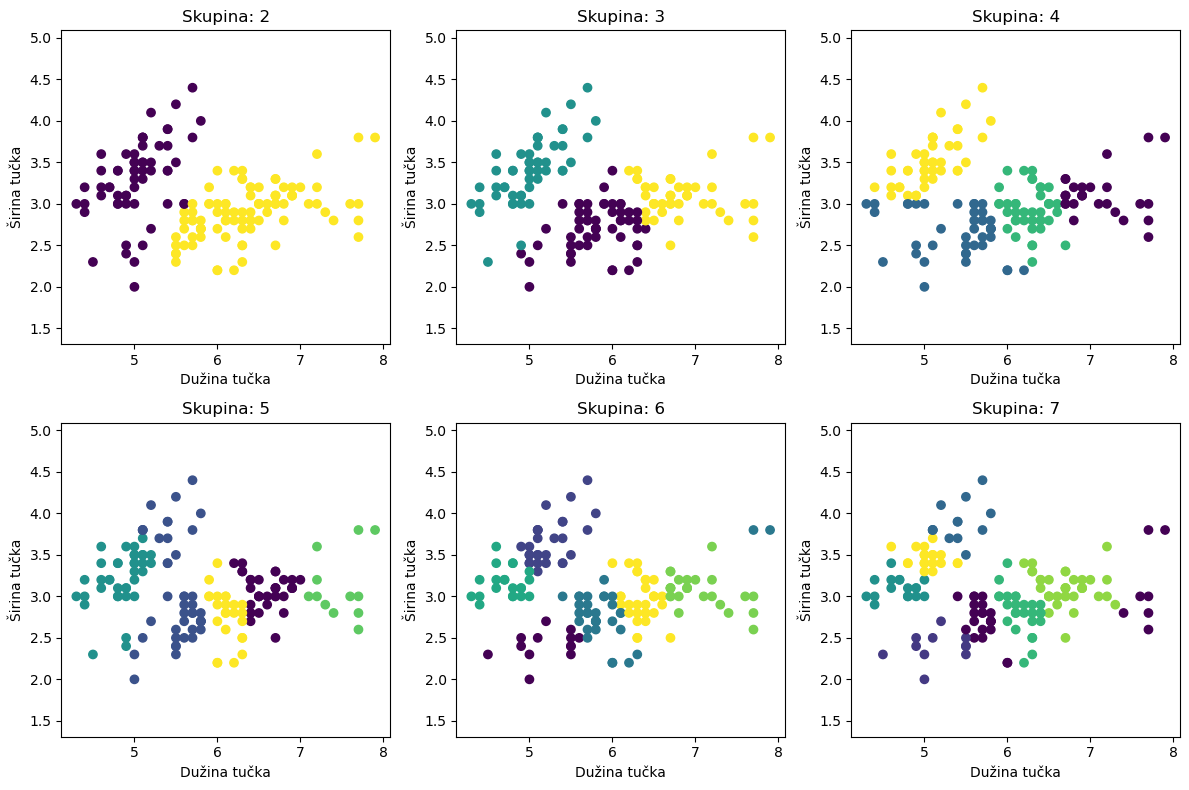

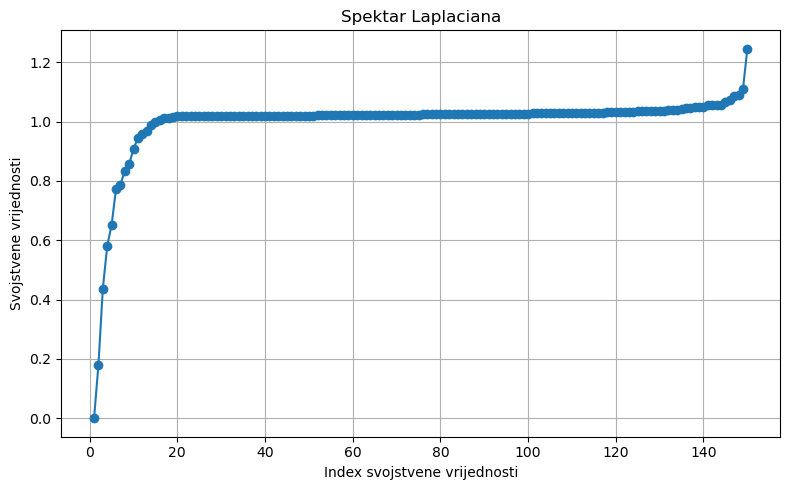

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, :2]  # sepal length i width

max_clusters = [2,3,4,5,6,7]
# usporedba s različitim vrijednostima ncut
#max_clusters = [1,2,3,5,7,11]

n_cols = 3
n_rows = 2
plt.figure(figsize=(4 * n_cols, 4 * n_rows))

current_num_of_clusters = 0
for i, clust in enumerate(max_clusters):
    model = SpectralClusteringNJW(
        sigma_X=0.5,
        max_clusters=clust
    )
    clusters = model.segment_2d(X)

    plt.subplot(n_rows, n_cols, i+1)
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
    plt.title(f'Skupina: {clust}')
    plt.xlabel('Dužina tučka')
    plt.ylabel('Širina tučka')
    plt.axis('equal')

plt.tight_layout()
plt.show()


plt.figure(figsize=(8,5))
plt.plot(np.arange(1, len(model.eigvals)+1), model.eigvals, 'o-')
plt.title('Spektar Laplaciana')
plt.xlabel('Index svojstvene vrijednosti')
plt.ylabel('Svojstvene vrijednosti')
plt.grid(True)
plt.tight_layout()
plt.show()


Primjer kako reagira na šum: NJW koristi matricu sličnosti prema blizini, a šumovi su slabo povezani s ostatkom podatala
Zašto k-means dobro ne grupira: jer ovisi o početnom položaju središta koji su nasumično određena: ako centar na početku padne blizu šuma, onda će i u tom prostoru biti veća skupina. Ako početna središta padnu u gušće podatke, onda će grupiranje biti ok. Na tom primjeru vidimo i stabilnost NJM metode, to jest spektralne metode generalo, iako je i NJW promjenjima jer ovisi o algoritmu k-sredina. Uglavom, šum ne utječe na grupiranje podataka, nego će biti dodijeljeni najbližoj skupini

možda staviti u općeniti dio za spektralmo grupiranje??

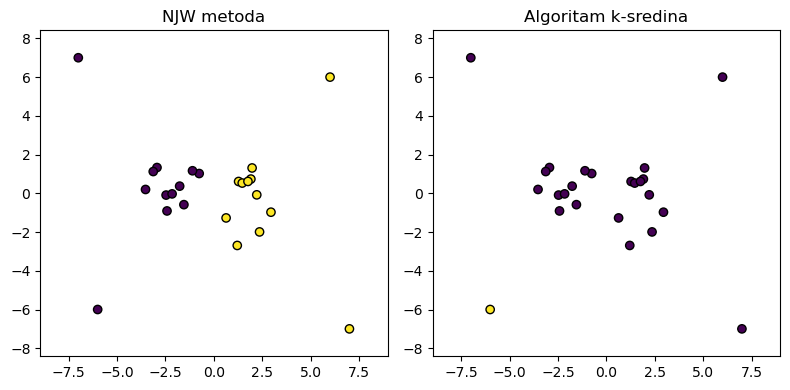

In [29]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

#k-means
import KMeansAlogrithm
importlib.reload(KMeansAlogrithm)
KMeansCustom = KMeansAlogrithm.KMeansCustom

""" podatci: dva skupine sa šumom """
X_core, _ = make_blobs(n_samples=20, centers=[[-2, 0], [2, 0]], cluster_std=0.9)
outliers = np.array([[6, 6], [-6, -6], [7, -7], [-7, 7]]) 
X = np.vstack([X_core, outliers])

""" NJW metoda spektralnog grupiranja """
sc = SpectralClusteringNJW(sigma_X=0.5, max_clusters=2)
clusters_sc = sc.segment_2d(X)

""" Algoritam k-sredina """
kmeans = KMeansCustom(n_clusters=2, data=X)
clusters_kmeans, _ = kmeans.pipeline()

""" vizualizacija rezultata """
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].scatter(X[:, 0], X[:, 1], c=clusters_sc, cmap='viridis', edgecolors='k')
axs[0].set_title(f'NJW metoda')
axs[0].axis('equal')

axs[1].scatter(X[:, 0], X[:, 1], c=clusters_kmeans, cmap='viridis', edgecolors='k')
axs[1].set_title(f'Algoritam k-sredina')
axs[1].axis('equal')

plt.tight_layout()
plt.show()


### 3.3. KVV metoda


L: 
 1.00 -0.18 -0.21 -0.02 -0.37 -0.00 -0.00 -0.00 -0.00 -0.00
-0.18  1.00 -0.02 -0.17 -0.33 -0.17 -0.00 -0.02 -0.00 -0.01
-0.21 -0.02  1.00 -0.18 -0.37 -0.00 -0.00 -0.00 -0.00 -0.00
-0.02 -0.17 -0.18  1.00 -0.33 -0.02 -0.00 -0.17 -0.00 -0.01
-0.37 -0.33 -0.37 -0.33  1.00 -0.01 -0.00 -0.01 -0.00 -0.00
-0.00 -0.17 -0.00 -0.02 -0.01  1.00 -0.18 -0.17 -0.02 -0.33
-0.00 -0.00 -0.00 -0.00 -0.00 -0.18  1.00 -0.02 -0.21 -0.37
-0.00 -0.02 -0.00 -0.17 -0.01 -0.17 -0.02  1.00 -0.18 -0.33
-0.00 -0.00 -0.00 -0.00 -0.00 -0.02 -0.21 -0.18  1.00 -0.37
-0.00 -0.01 -0.00 -0.01 -0.00 -0.33 -0.37 -0.33 -0.37  1.00
[9 8 6 7 5]
 1.00 -0.37 -0.37 -0.33 -0.33
-0.37  1.00 -0.21 -0.18 -0.02
-0.37 -0.21  1.00 -0.02 -0.18
-0.33 -0.18 -0.02  1.00 -0.17
-0.33 -0.02 -0.18 -0.17  1.00
Cheegerova propusnost:
[[0.9999999999999999, 0.6566018312791855, 0.3777523725072444, 0.23005534794073723, 0.07578667258177879, 0.23005534794073734, 0.3777523725072445, 0.6566018312791856, 1.0000000000000002], [1.0, 0.7067018632226345,

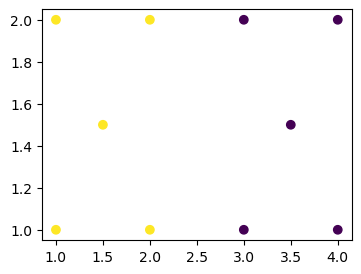

In [30]:

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import KVVALgorithm
importlib.reload(KVVALgorithm)
SpectralClusteringKVV = KVVALgorithm.SpectralClusteringKVV

X = np.array([
    [1, 1], [2, 1], [1, 2], [2, 2], [1.5, 1.5],
    [3, 1], [4, 1], [3, 2], [4, 2], [3.5, 1.5]
])
model = SpectralClusteringKVV(
        sigma_X=0.5,              
        cheeger_cond_max=0.3,
        adjustion="kvv_mult"
    )
clusters = model.segment_2d(X)
print('L: ')
print_matrix(model.L)
print(model.L_subs_indices[1][1])
print_matrix(model.L_subs_indices[1][0])
print('Cheegerova propusnost:')
print(model.all_cheeger_cond_values)
#for s in model.L_subs:
plt.figure(figsize=(4, 3))
plt.scatter(X[:, 0], X[:, 1], c=clusters) 
plt.show()

iteracija 0.:
sortirani podatci prema Fiedlerovom vektoru:.: [9 8 6 7 5 3 1 0 2 4]
Fiedlerov vektor: [ 0.315  0.233  0.315  0.233  0.44  -0.233 -0.315 -0.233 -0.315 -0.44 ]
Chhegerove vrijednosti: [0.9999999999999999, 0.6566018312791855, 0.3777523725072444, 0.23005534794073723, 0.07578667258177879, 0.23005534794073734, 0.3777523725072445, 0.6566018312791856, 1.0000000000000002]
iteracija 1.:
sortirani podatci prema Fiedlerovom vektoru:.: [0 2 1 4 3]
Fiedlerov vektor: [-0.277  0.009  0.009  0.679  0.679]
Chhegerove vrijednosti: [1.0, 0.7067018632226345, 0.7939680908099814, 1.0]
iteracija 2.:
sortirani podatci prema Fiedlerovom vektoru:.: [4 2 3 1 0]
Fiedlerov vektor: [0.595 0.595 0.319 0.319 0.298]
Chhegerove vrijednosti: [1.0, 0.7067018632226345, 0.7939680908099815, 1.0000000000000002]
Pozicija: min vrijednost cheegerove propusnosti => {5: 0.07578667258177879}
Drugi korak iteracije:
Laplaceova matrica kvv_mult prije:
 1.00 -0.37 -0.37 -0.33 -0.33
-0.37  1.00 -0.21 -0.18 -0.02
-0.37 -0.

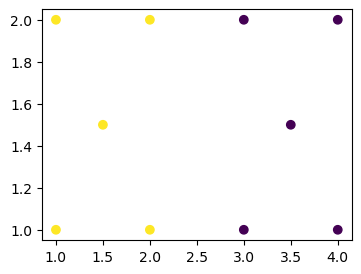

iteracija 0.:
sortirani podatci prema Fiedlerovom vektoru:.: [9 8 6 7 5 3 1 0 2 4]
Fiedlerov vektor: [ 0.315  0.233  0.315  0.233  0.44  -0.233 -0.315 -0.233 -0.315 -0.44 ]
Chhegerove vrijednosti: [0.9999999999999999, 0.6566018312791855, 0.3777523725072444, 0.23005534794073723, 0.07578667258177879, 0.23005534794073734, 0.3777523725072445, 0.6566018312791856, 1.0000000000000002]
iteracija 1.:
sortirani podatci prema Fiedlerovom vektoru:.: [4 2 0 1 3]
Fiedlerov vektor: [-0.     0.403 -0.403  0.581 -0.581]
Chhegerove vrijednosti: [1.0, 0.7939680908099814, 0.7939680908099815, 1.0]
iteracija 2.:
sortirani podatci prema Fiedlerovom vektoru:.: [1 2 4 3 0]
Fiedlerov vektor: [ 0.581 -0.581 -0.403  0.403 -0.   ]
Chhegerove vrijednosti: [1.0000000000000002, 0.7939680908099815, 0.7939680908099815, 1.0000000000000002]
Pozicija: min vrijednost cheegerove propusnosti => {5: 0.07578667258177879}
Drugi korak iteracije:
Laplaceova matrica kvv_add prije:
 1.00 -0.37 -0.37 -0.33 -0.33
-0.37  1.00 -0.21 -0

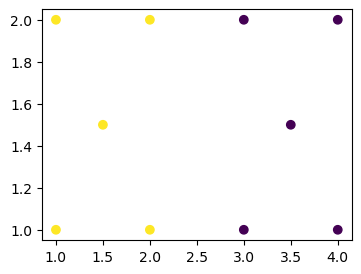

In [31]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
#kvv
import KVVALgorithm
importlib.reload(KVVALgorithm)
SpectralClusteringKVV = KVVALgorithm.SpectralClusteringKVV

""" X = np.array([
    [1.0, 1.0],[1.2, 3.8],[2.9, 1.1],[5.0, 6.0],[4.1, 4.9],[4.8, 6.2],
    [7.0, 2.0],[8.1, 1.2],[8.2, 0.9],[9.2, 3.1]
]) """

X = np.array([
    [1, 1], [2, 1], [1, 2], [2, 2], [1.5, 1.5],
    [3, 1], [4, 1], [3, 2], [4, 2], [3.5, 1.5]
])

model = SpectralClusteringKVV(
        sigma_X=0.5,              
        cheeger_cond_max=0.3,
        adjustion="kvv_mult"
    )
clusters = model.segment_2d(X)

for i, (vec, cheeg, idx) in enumerate(zip(model.fiedler_vectors, model.all_cheeger_cond_values, model.sorted_indexes)):
    rounded_vec = np.round(vec, 3)
    print(f"iteracija {i}.:")
    print(f"sortirani podatci prema Fiedlerovom vektoru:.: {idx}")
    print(f"Fiedlerov vektor: {rounded_vec}")
    print(f"Chhegerove vrijednosti: {cheeg}")
for i, split in enumerate(model.splits):
    rounded_vec = np.round(vec, 3)
    print(f"Pozicija: min vrijednost cheegerove propusnosti => {split}")


print('Drugi korak iteracije:')
print('Laplaceova matrica kvv_mult prije:')
print_matrix(model.L_subs[0][0])

print('Koeficijeni s kojima množimo:')
print_matrix(model.L_subs[0][1])
print('normalizirana Laplaceova matrica kvv_mult:')
print_matrix(model.L_subs[0][2])


plt.figure(figsize=(4, 3))
plt.scatter(X[:, 0], X[:, 1], c=clusters) 
plt.show()



model = SpectralClusteringKVV(
        sigma_X=0.5,              
        cheeger_cond_max=0.1,
        adjustion="kvv_add"
    )
clusters = model.segment_2d(X)

for i, (vec, cheeg, idx) in enumerate(zip(model.fiedler_vectors, model.all_cheeger_cond_values, model.sorted_indexes)):
    rounded_vec = np.round(vec, 3)
    print(f"iteracija {i}.:")
    print(f"sortirani podatci prema Fiedlerovom vektoru:.: {idx}")
    print(f"Fiedlerov vektor: {rounded_vec}")
    print(f"Chhegerove vrijednosti: {cheeg}")
for i, split in enumerate(model.splits):
    rounded_vec = np.round(vec, 3)
    print(f"Pozicija: min vrijednost cheegerove propusnosti => {split}")


print('Drugi korak iteracije:')
print('Laplaceova matrica kvv_add prije:')
print_matrix(model.L_subs[0][0])

print('Koeficijeni s kojima množimo:')
print_matrix(model.L_subs[0][1])
print('normalizirana Laplaceova matrica kvv_mult:')
print_matrix(model.L_subs[0][2])


plt.figure(figsize=(4, 3))
plt.scatter(X[:, 0], X[:, 1], c=clusters) 
plt.show()



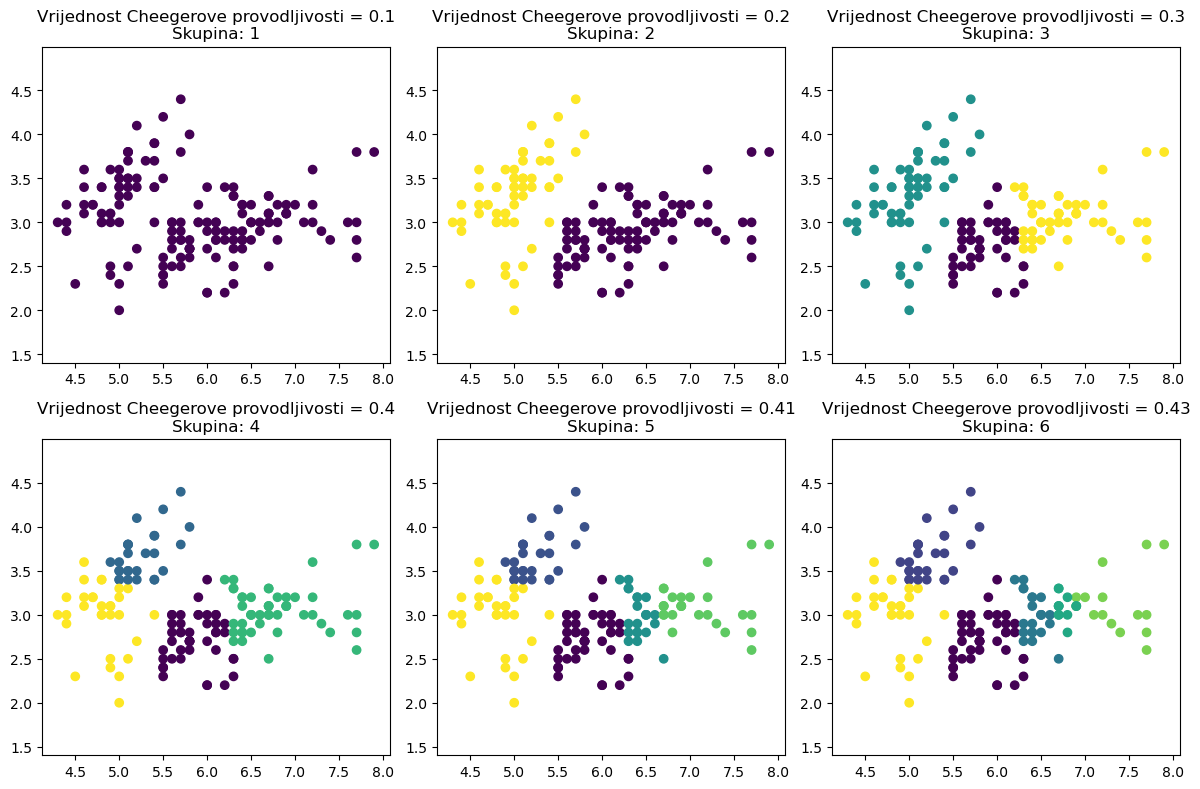

In [32]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris


""" points = np.array([[3.97, 1.95],[2.33, 4.24],[2.92, 0.19],[1.45, 1.86],[4.04, 2.85],[1.96, 2.  ],[1.35, 2.05],[2.8,  2.44],
                   [4.99, 2.75],[3.81, 0.14],[3.96, 1.15],[1.76, 0.04],[3.21, 3.96],[3.05, 4.32],[0.28, 2.83],
                   [4.09, 1.58],[0.71, 4.  ],[0.7,  1.61],[1.22, 0.67],[3.16, 4.83]])
cond_values = [0.01, 0.03, 0.27, 0.4 , 0.6, 0.8] """

iris = load_iris()
points = iris.data[:, :2]

cond_values = [0.1, 0.2, 0.3, 0.4, 0.41, 0.43]

n_cols = 3
n_rows = 2
plt.figure(figsize=(4 * n_cols, 4 * n_rows))

for i, cond in enumerate(cond_values):
    model = SpectralClusteringKVV(
        sigma_X=0.5,
        cheeger_cond_max=cond,
        adjustion="kvv_add"
    )
    clusters = model.segment_2d(points)
    plt.subplot(n_rows, n_cols, i+1)
    plt.scatter(points[:, 0], points[:, 1], c=clusters, cmap='viridis')
    plt.title(f'Vrijednost Cheegerove provodljivosti = {np.round(cond,2)}\nSkupina: {len(np.unique(clusters))}')
    plt.axis('equal')

plt.tight_layout()
plt.show()

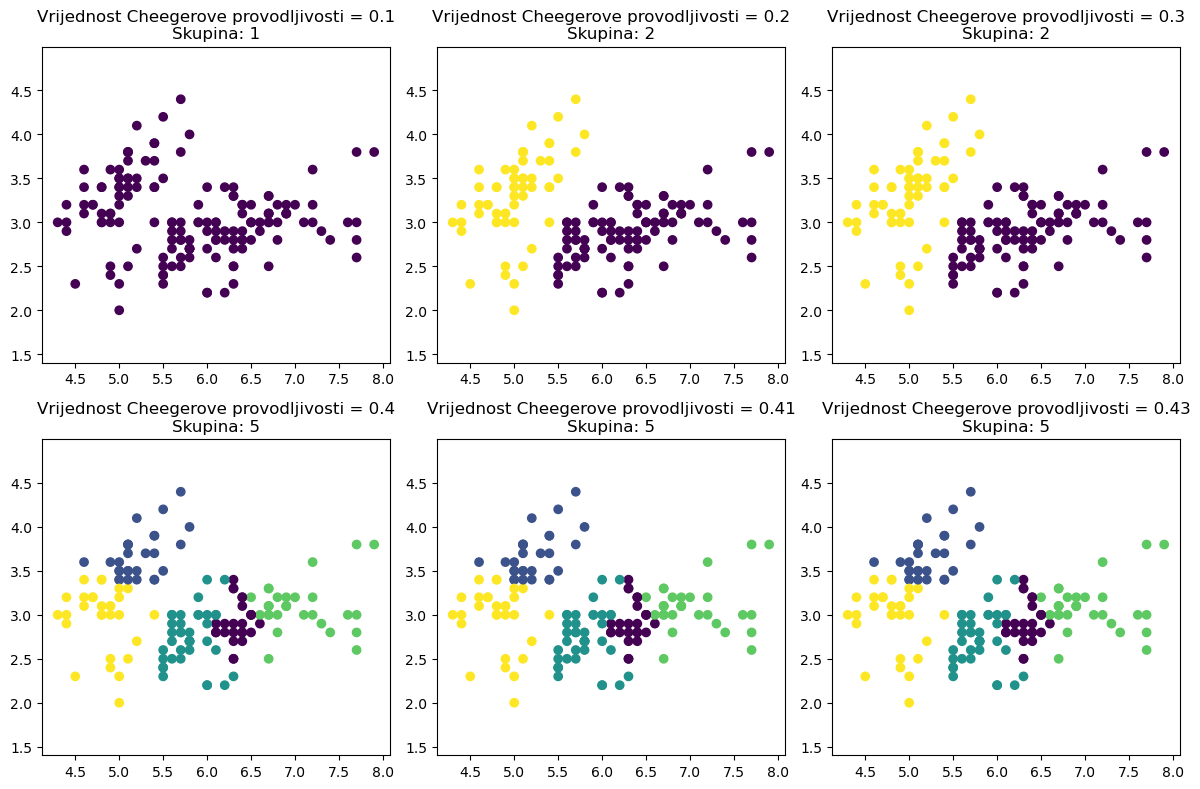

In [33]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris


""" points = np.array([[3.97, 1.95],[2.33, 4.24],[2.92, 0.19],[1.45, 1.86],[4.04, 2.85],[1.96, 2.  ],[1.35, 2.05],[2.8,  2.44],
                   [4.99, 2.75],[3.81, 0.14],[3.96, 1.15],[1.76, 0.04],[3.21, 3.96],[3.05, 4.32],[0.28, 2.83],
                   [4.09, 1.58],[0.71, 4.  ],[0.7,  1.61],[1.22, 0.67],[3.16, 4.83]])
cond_values = [0.01, 0.03, 0.27, 0.4 , 0.6, 0.8] """

iris = load_iris()
points = iris.data[:, :2]

cond_values = [0.1, 0.2, 0.3, 0.4, 0.41, 0.43]

n_cols = 3
n_rows = 2
plt.figure(figsize=(4 * n_cols, 4 * n_rows))

for i, cond in enumerate(cond_values):
    model = SpectralClusteringKVV(
        sigma_X=0.5,
        cheeger_cond_max=cond,
        adjustion="kvv_mult"
    )
    clusters = model.segment_2d(points)
    plt.subplot(n_rows, n_cols, i+1)
    plt.scatter(points[:, 0], points[:, 1], c=clusters, cmap='viridis')
    plt.title(f'Vrijednost Cheegerove provodljivosti = {np.round(cond,2)}\nSkupina: {len(np.unique(clusters))}')
    plt.axis('equal')

plt.tight_layout()
plt.show()

### 4.2. Usporedba algoritama


ARI:
NJW vs KVV: 0.9469
NJW vs SM : 0.9469
KVV vs SM : 1.0000

NMI:
NJW vs KVV: 0.9081
NJW vs SM : 0.9081
KVV vs SM : 1.0000


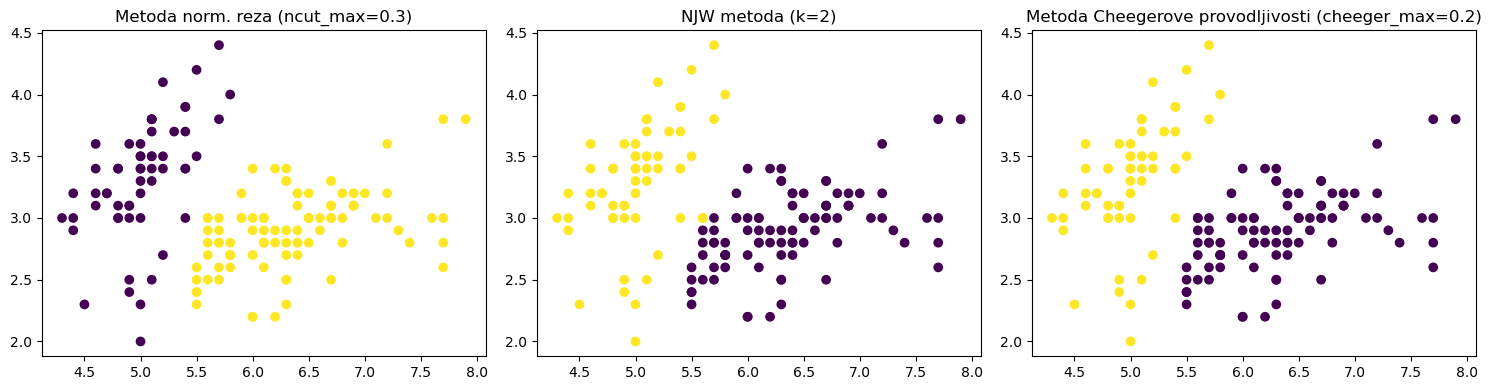

ARI:
NJW vs KVV: 0.8083
NJW vs SM : 0.8433
KVV vs SM : 0.9633

NMI:
NJW vs KVV: 0.8001
NJW vs SM : 0.8338
KVV vs SM : 0.9494


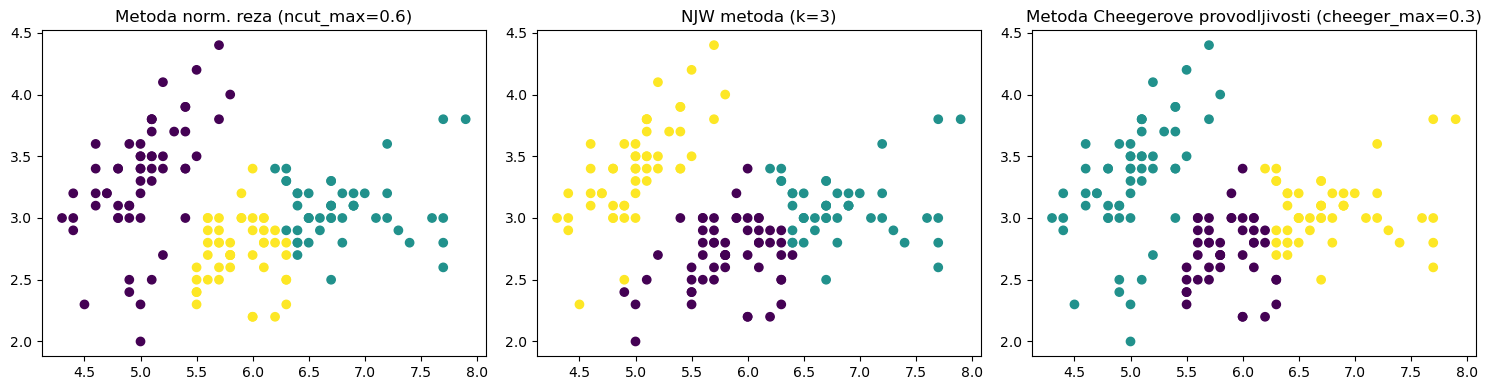

In [34]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

iris = load_iris()
X = iris.data[:, :2]  

data = [[0.3, 2, 0.2], [0.6, 3, 0.3]]

for i, clusters in enumerate(data):
    sm = SpectralClusteringSM(ncut_max=clusters[0], sigma_X=0.5)
    sm_clusters = sm.segment_2d(X)
    
    njw = SpectralClusteringNJW(max_clusters=clusters[1], sigma_X=0.5)
    njw_clusters = njw.segment_2d(X)
    
    kvv = SpectralClusteringKVV(cheeger_cond_max=clusters[2], sigma_X=0.5, adjustion="kvv_add")
    kvv_clusters = kvv.segment_2d(X)

    ari_njw_kvv = adjusted_rand_score(njw_clusters[0], kvv_clusters[0])
    ari_njw_sm = adjusted_rand_score(njw_clusters[0], sm_clusters[0])
    ari_kvv_sm = adjusted_rand_score(kvv_clusters[0], sm_clusters[0])

    nmi_njw_kvv = normalized_mutual_info_score(njw_clusters[0], kvv_clusters[0])
    nmi_njw_sm = normalized_mutual_info_score(njw_clusters[0], sm_clusters[0])
    nmi_kvv_sm = normalized_mutual_info_score(kvv_clusters[0], sm_clusters[0])

    print("ARI:")
    print(f"NJW vs KVV: {ari_njw_kvv:.4f}")
    print(f"NJW vs SM : {ari_njw_sm:.4f}")
    print(f"KVV vs SM : {ari_kvv_sm:.4f}")

    print("\nNMI:")
    print(f"NJW vs KVV: {nmi_njw_kvv:.4f}")
    print(f"NJW vs SM : {nmi_njw_sm:.4f}")
    print(f"KVV vs SM : {nmi_kvv_sm:.4f}")

    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    axes[0].scatter(X[:, 0], X[:, 1], c=sm_clusters[0], cmap='viridis')
    axes[0].set_title(f'Metoda norm. reza (ncut_max={clusters[0]})')

    axes[1].scatter(X[:, 0], X[:, 1], c=njw_clusters[0], cmap='viridis')
    axes[1].set_title(f'NJW metoda (k={clusters[1]})')

    axes[2].scatter(X[:, 0], X[:, 1], c=kvv_clusters[0], cmap='viridis')
    axes[2].set_title(f'Metoda Cheegerove provodljivosti (cheeger_max={clusters[2]})')

    plt.tight_layout()
    plt.show()


NMI

ARI:
NJW vs KVV: 0.6597
NJW vs SM : 0.5737
KVV vs SM : 0.6553

NMI:
NJW vs KVV: 0.7498
NJW vs SM : 0.6787
KVV vs SM : 0.7605


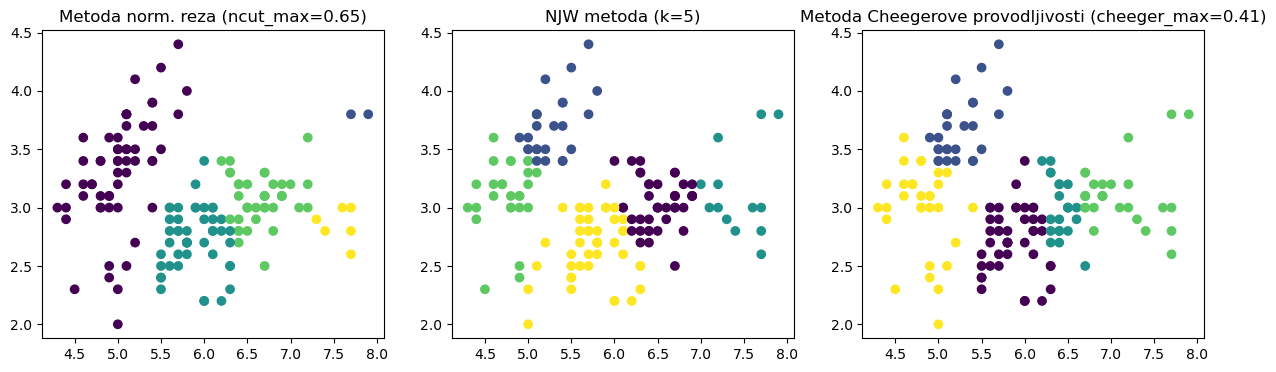

In [52]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

iris = load_iris()
X = iris.data[:, :2]  

sm = SpectralClusteringSM(ncut_max=0.687, sigma_X=0.5)
sm_clusters = sm.segment_2d(X)

njw = SpectralClusteringNJW(max_clusters=5, sigma_X=0.5)
njw_clusters = njw.segment_2d(X)
    
kvv = SpectralClusteringKVV(cheeger_cond_max=0.41, sigma_X=0.5, adjustion="kvv_add")
kvv_clusters = kvv.segment_2d(X)

ari_njw_kvv = adjusted_rand_score(njw_clusters[0], kvv_clusters[0])
ari_njw_sm = adjusted_rand_score(njw_clusters[0], sm_clusters[0])
ari_kvv_sm = adjusted_rand_score(kvv_clusters[0], sm_clusters[0])

nmi_njw_kvv = normalized_mutual_info_score(njw_clusters[0], kvv_clusters[0])
nmi_njw_sm = normalized_mutual_info_score(njw_clusters[0], sm_clusters[0])
nmi_kvv_sm = normalized_mutual_info_score(kvv_clusters[0], sm_clusters[0])

print("ARI:")
print(f"NJW vs KVV: {ari_njw_kvv:.4f}")
print(f"NJW vs SM : {ari_njw_sm:.4f}")
print(f"KVV vs SM : {ari_kvv_sm:.4f}")

print("\nNMI:")
print(f"NJW vs KVV: {nmi_njw_kvv:.4f}")
print(f"NJW vs SM : {nmi_njw_sm:.4f}")
print(f"KVV vs SM : {nmi_kvv_sm:.4f}")

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].scatter(X[:, 0], X[:, 1], c=sm_clusters[0], cmap='viridis')
axes[0].set_title(f'Metoda norm. reza (ncut_max={0.65})')

axes[1].scatter(X[:, 0], X[:, 1], c=njw_clusters[0], cmap='viridis')
axes[1].set_title(f'NJW metoda (k={5})')

axes[2].scatter(X[:, 0], X[:, 1], c=kvv_clusters[0], cmap='viridis')
axes[2].set_title(f'Metoda Cheegerove provodljivosti (cheeger_max={0.41})')

plt.show()


### 5.2. Segmentacija slika


In [36]:
def visualize_line_sigma_I(image_name, values, custom):
    fig, axs = plt.subplots(1, len(values) + 1, figsize=(15, 3))

    clusterer = SpectralClusteringSM(sigma_I=0.1, sigma_X=5.0, r=10, lanczos_k=30, l=10, ncut_max=0.3)
    clusterer.load_image(image_name) 

    axs[0].imshow(clusterer.img, cmap='gray')
    axs[0].set_title('Original')
    axs[0].axis('off')

    for idx, n in enumerate(values):
        clusterer = SpectralClusteringSM(sigma_I=n, sigma_X=100, r=10, lanczos_k=10, l=10, ncut_max=0.7)
        clusterer.load_image(image_name)
        segmented = clusterer.segment_image()
        if custom == True:
            # ------------------------------------------------------  custom set boja ----------------------------
            cmap_custom = clusterer.average_color()
            axs[idx + 1].imshow(segmented, cmap=cmap_custom)
        else:
            axs[idx + 1].imshow(segmented, cmap='gray')
        axs[idx + 1].set_title(f'Segm (sigma_I={n})')
        axs[idx + 1].axis('off')

    plt.tight_layout()
    plt.show()

custom boje


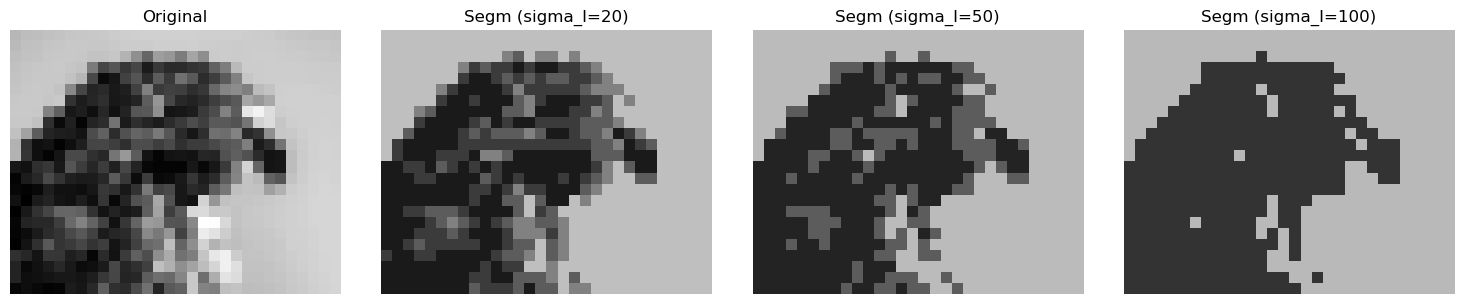

In [37]:
print('custom boje')
visualize_line_sigma_I('images/eagle_30px.png', [20,50,100], True)



In [38]:
def visualize_line_sigma_X(image_name, values, custom):
    fig, axs = plt.subplots(1, len(values) + 1, figsize=(15,3))

    clusterer = SpectralClusteringSM(sigma_I=0.1, sigma_X=5.0, r=10, lanczos_k=30, l=10, ncut_max=0.3)
    clusterer.load_image(image_name) 

    axs[0].imshow(clusterer.img, cmap='gray')
    axs[0].set_title('Original')
    axs[0].axis('off')

    for idx, n in enumerate(values):
        clusterer = SpectralClusteringSM(sigma_I=20, sigma_X=n, r=10, lanczos_k=10, l=10, ncut_max=0.7)
        clusterer.load_image(image_name)
        segmented = clusterer.segment_image()
        if custom == True:
            # ------------------------------------------------------  custom set boja ----------------------------
            cmap_custom = clusterer.average_color()
            axs[idx + 1].imshow(segmented, cmap=cmap_custom)
        else:
            axs[idx + 1].imshow(segmented, cmap='gray')
        axs[idx + 1].set_title(f'Segm (sigma_X={n})')
        axs[idx + 1].axis('off')

    plt.tight_layout()
    plt.show()

custom boje


KeyboardInterrupt: 

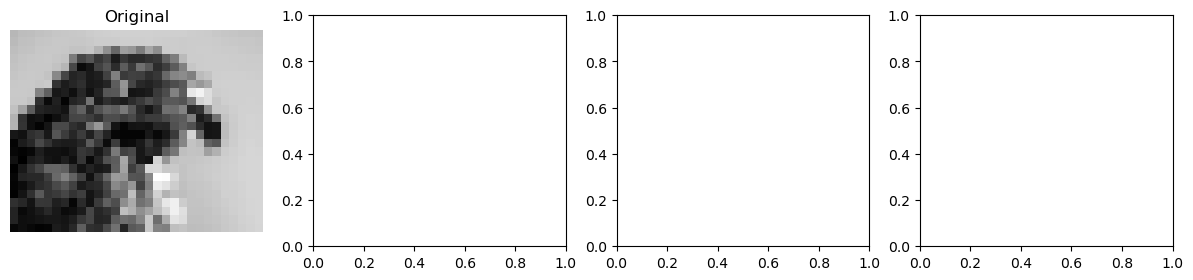

In [39]:
print('custom boje')
visualize_line_sigma_X('images/eagle_30px.png', [5,10,50], True)



In [ ]:
def visualize_line_r(image_name, values, custom):
    fig, axs = plt.subplots(1, len(values) + 1, figsize=(15, 3))

    clusterer = SpectralClusteringSM(sigma_I=0.1, sigma_X=5.0, r=10, lanczos_k=30, l=10, ncut_max=0.3)
    clusterer.load_image(image_name) 

    axs[0].imshow(clusterer.img, cmap='gray')
    axs[0].set_title('Original')
    axs[0].axis('off')

    for idx, n in enumerate(values):
        clusterer = SpectralClusteringSM(sigma_I=50, sigma_X=100, r=n, lanczos_k=10, l=10, ncut_max=0.7)
        clusterer.load_image(image_name)
        segmented = clusterer.segment_image()
        if custom == True:
            # ------------------------------------------------------  custom set boja ----------------------------
            cmap_custom = clusterer.average_color()
            axs[idx + 1].imshow(segmented, cmap=cmap_custom)
        else:
            axs[idx + 1].imshow(segmented, cmap='gray')
        axs[idx + 1].set_title(f'Segm (r={n})')
        axs[idx + 1].axis('off')

    plt.tight_layout()
    plt.show()

custom boje


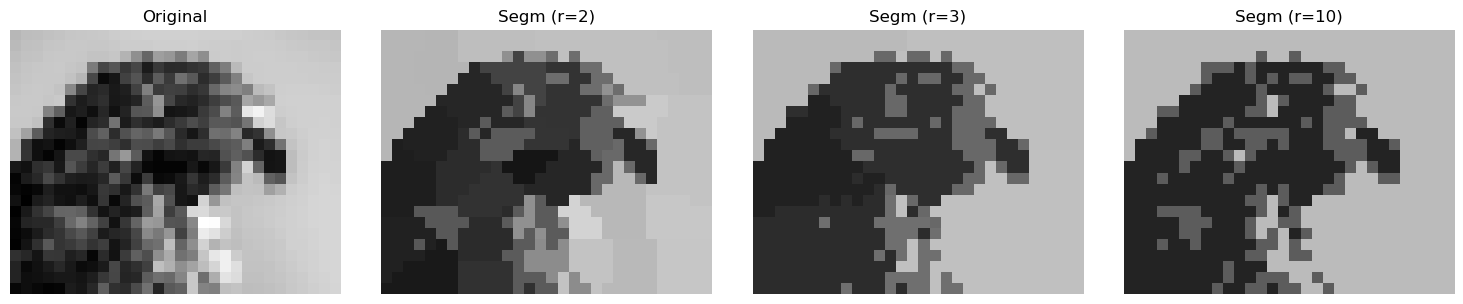

In [ ]:
print('custom boje')
visualize_line_r('images/eagle_30px.png', [2,3,10], True)



In [ ]:
def visualize_line(image_name, values, custom):
    fig, axs = plt.subplots(1, len(values) + 1, figsize=(20, 4))

    clusterer = SpectralClusteringSM(sigma_I=0.1, sigma_X=5.0, r=10, lanczos_k=30, l=10, ncut_max=0.3)
    clusterer.load_image(image_name) 

    axs[0].imshow(clusterer.img, cmap='gray')
    axs[0].set_title('Original')
    axs[0].axis('off')

    for idx, n in enumerate(values):
        clusterer = SpectralClusteringSM(sigma_I=50, sigma_X=100, r=10, lanczos_k=10, l=10, ncut_max=n)
        clusterer.load_image(image_name)
        segmented = clusterer.segment_image()
        if custom == True:
            # ------------------------------------------------------  custom set boja ----------------------------
            cmap_custom = clusterer.average_color()
            axs[idx + 1].imshow(segmented, cmap=cmap_custom)
        else:
            axs[idx + 1].imshow(segmented, cmap='gray')
        axs[idx + 1].set_title(f'Segm (n_cut={n})')
        axs[idx + 1].axis('off')

    plt.tight_layout()
    plt.show()

custom boje


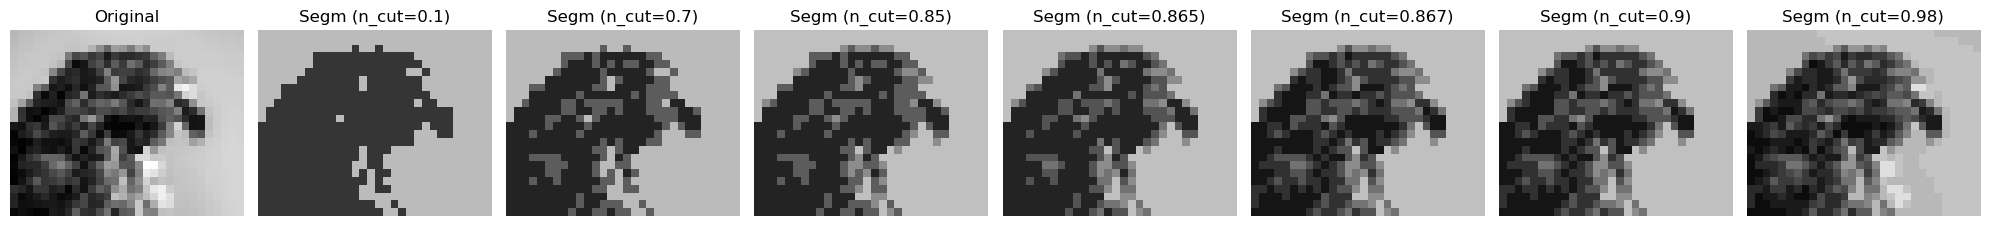

random boje


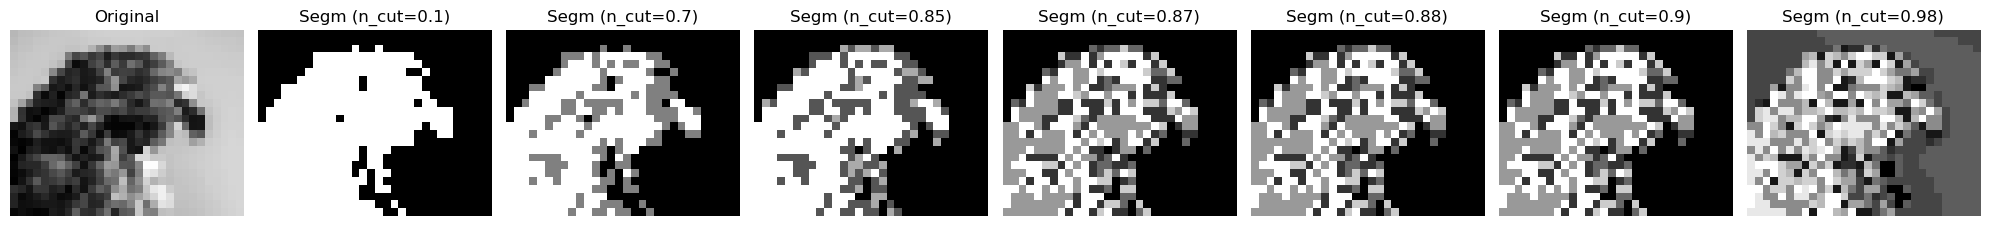

In [ ]:
print('custom boje')
visualize_line('images/eagle_30px.png', [0.1,0.7, 0.85,  0.865, 0.867, 0.9, 0.98], True)

print('random boje')
visualize_line('images/eagle_30px.png', [0.1,0.7, 0.85, 0.87,0.88, 0.9, 0.98],False)


In [ ]:
def visualize_line_NJW(image_name, values, custom):
    fig, axs = plt.subplots(1, len(values) + 1, figsize=(20, 4))

    clusterer = SpectralClusteringNJW(sigma_I=0.1, sigma_X=5.0, r=10, max_clusters =1)
    clusterer.load_image(image_name) 

    axs[0].imshow(clusterer.img, cmap='gray')
    axs[0].set_title('Original')
    axs[0].axis('off')

    for idx, m in enumerate(values):
        clusterer = SpectralClusteringNJW(sigma_I=50, sigma_X=100, r=20, max_clusters =m)
        clusterer.load_image(image_name)
        segmented = clusterer.segment_image()
        # ------------------------------------------------------  custom set boja ----------------------------
        if custom:
            cmap_custom = clusterer.average_color()
            axs[idx + 1].imshow(segmented, cmap=cmap_custom)
        else:
            axs[idx + 1].imshow(segmented, cmap='gray')
        axs[idx + 1].set_title(f'Segm.(max_cluster={m})')
        axs[idx + 1].axis('off')

    plt.tight_layout()
    plt.show()

custom boje


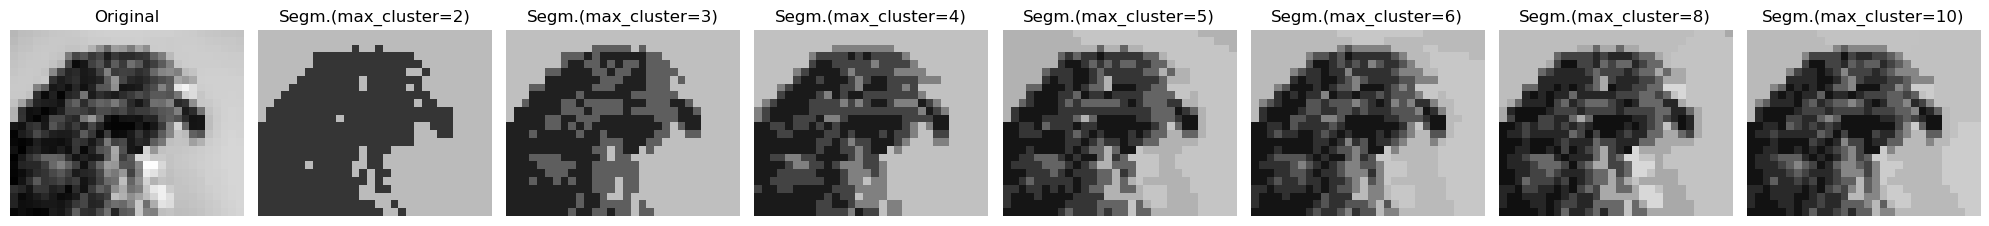

random boje


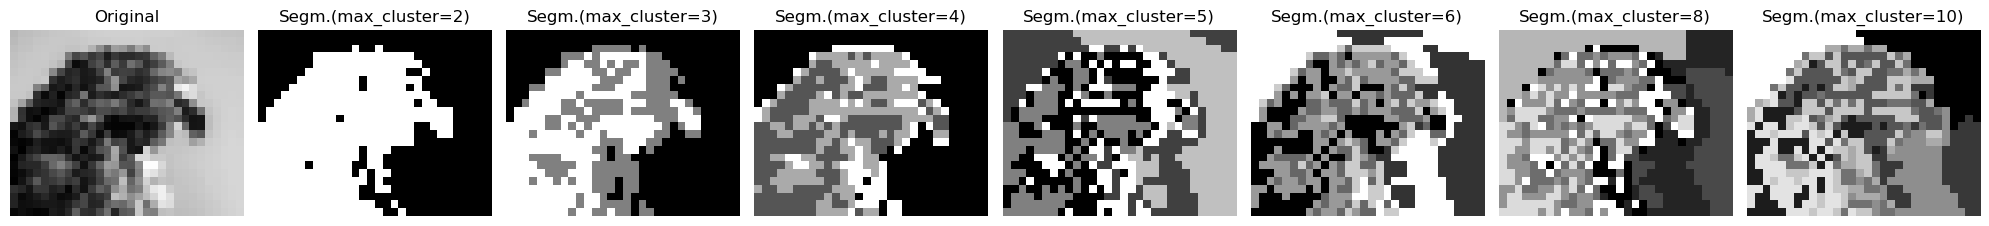

In [ ]:
print('custom boje')
visualize_line_NJW('images/eagle_30px.png', [2,3,4,5,6,8,10], True)
print('random boje')
visualize_line_NJW('images/eagle_30px.png', [2,3,4,5,6,8,10], False)

In [ ]:
def visualize_line_KVV(image_name, values, custom, adjustion):
    fig, axs = plt.subplots(1, len(values) + 1, figsize=(20, 4))

    clusterer = SpectralClusteringKVV(sigma_I=0.1, sigma_X=5.0, r=10, lanczos_k=30, l=10, cheeger_cond_max=0.3, adjustion=adjustion)
    clusterer.load_image(image_name) 

    axs[0].imshow(clusterer.img, cmap='gray')
    axs[0].set_title('Original')
    axs[0].axis('off')

    for idx, n in enumerate(values):
        clusterer = SpectralClusteringKVV(sigma_I=50, sigma_X=100, r=10, lanczos_k=10, l=10, cheeger_cond_max=n, adjustion=adjustion)
        clusterer.load_image(image_name)
        segmented = clusterer.segment_image()
        if custom == True:
            # ------------------------------------------------------  custom set boja ----------------------------
            cmap_custom = clusterer.average_color()
            axs[idx + 1].imshow(segmented, cmap=cmap_custom)
        else:
            axs[idx + 1].imshow(segmented, cmap='gray')
        axs[idx + 1].set_title(f'Segm (n_cut={n})')
        axs[idx + 1].axis('off')

    plt.tight_layout()
    plt.show()

custom boje


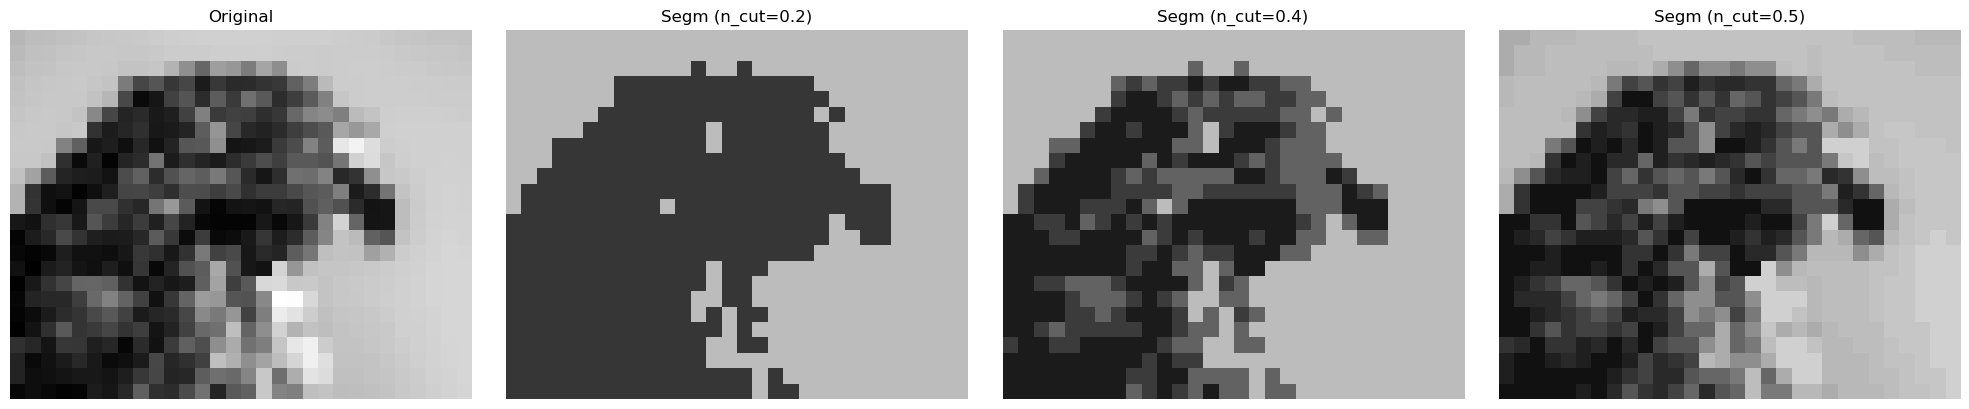

random boje


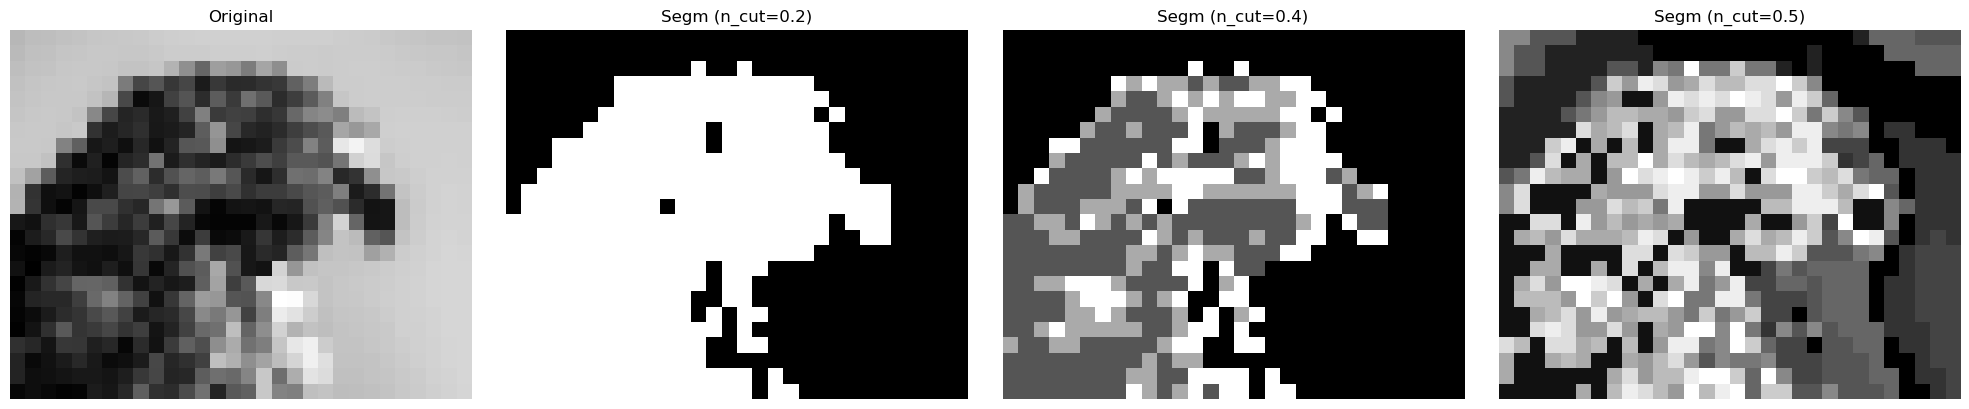

In [ ]:
print('custom boje')
visualize_line_KVV('images/eagle_30px.png', [0.2, 0.4, 0.5], True, "kvv_add")
print('random boje')
visualize_line_KVV('images/eagle_30px.png', [0.2, 0.4, 0.5], False, "kvv_add")

custom boje


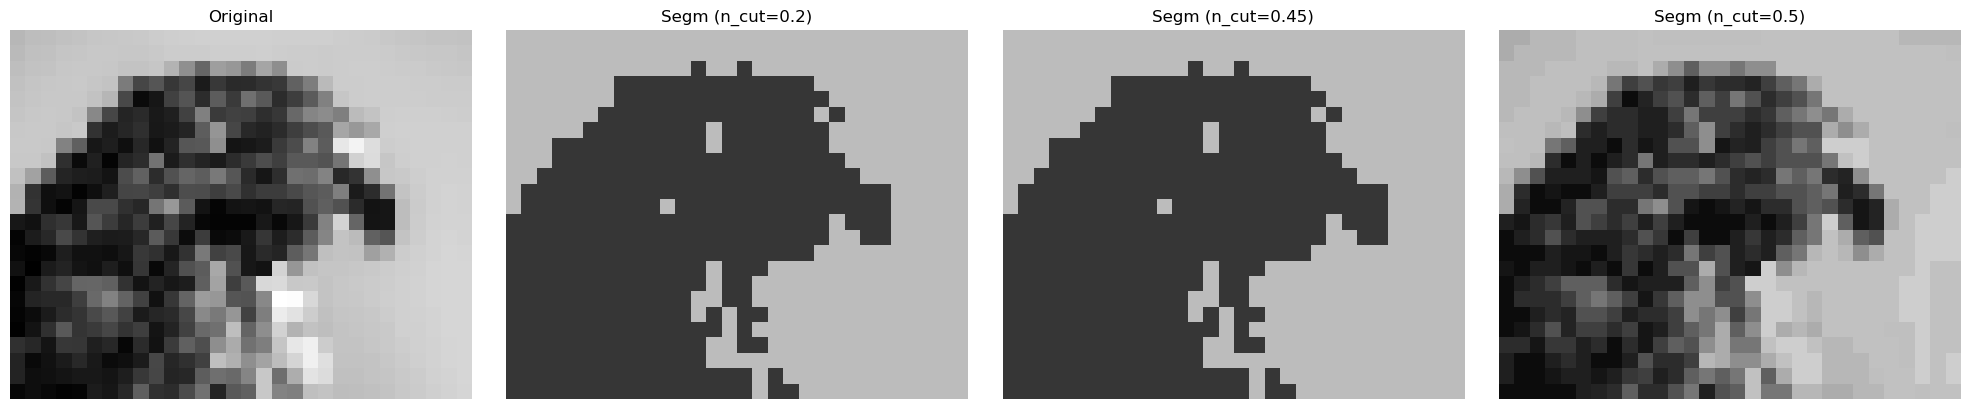

random boje


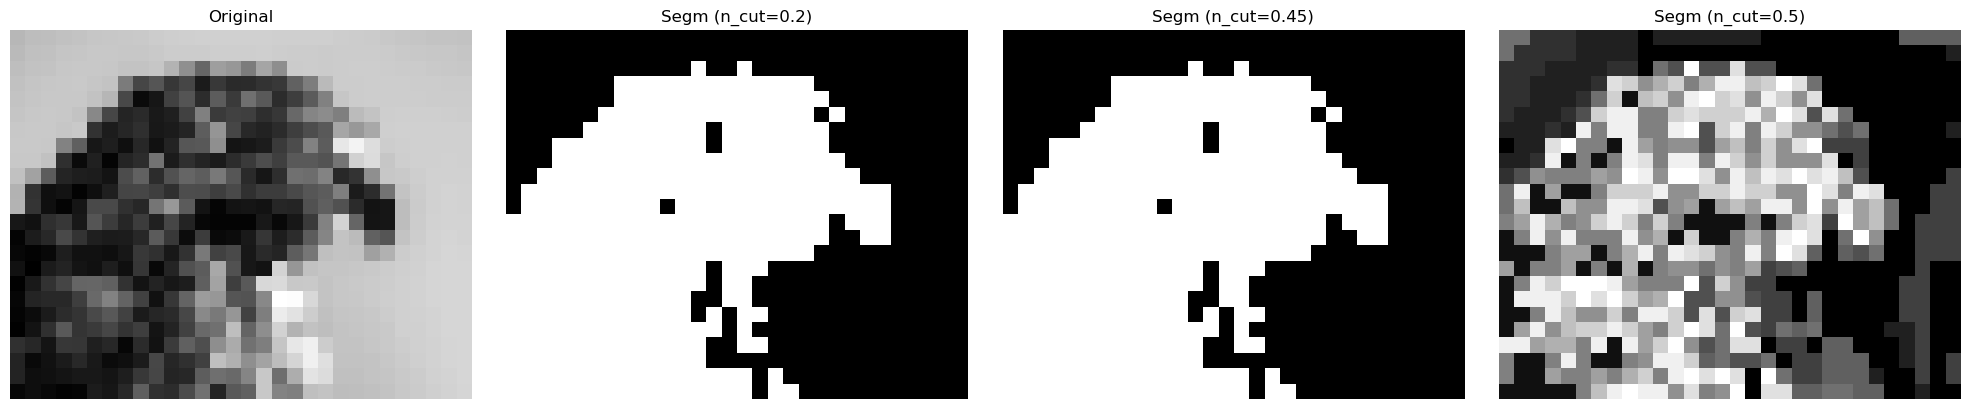

In [ ]:
print('custom boje')
visualize_line_KVV('images/eagle_30px.png', [0.2, 0.45, 0.5], True, "kvv_mult")
print('random boje')
visualize_line_KVV('images/eagle_30px.png', [0.2, 0.45, 0.5], False, "kvv_mult")

### 5.2. Društvene mreže


Broj vrhova, poznanika: 224
Broj bridova, poznanstva: 3192


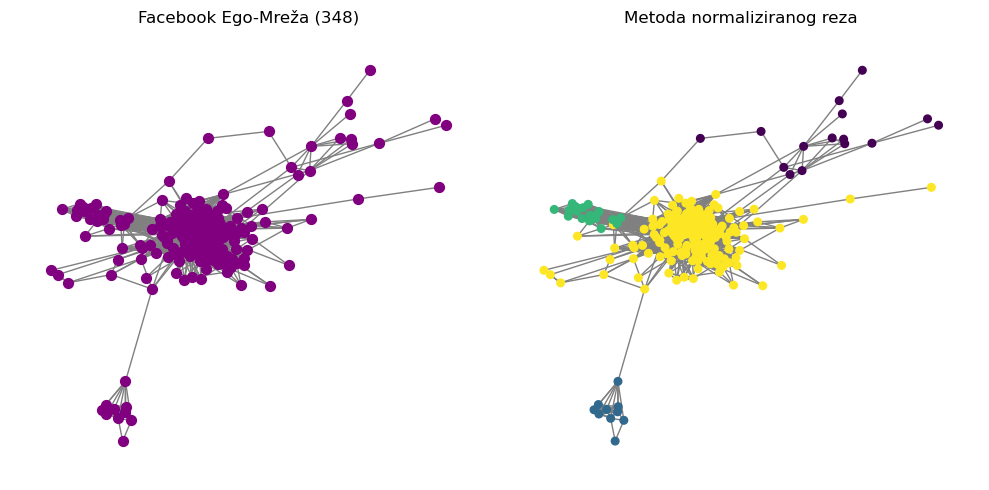

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
#sm
import SMAlgorithm
importlib.reload(SMAlgorithm)
SpectralClusteringSM = SMAlgorithm.SpectralClusteringSM


# Load graph
G = nx.Graph()
with open("facebook/facebook/348.edges") as f:
    for line in f:
        u, v = line.strip().split()
        G.add_edge(u, v)
        
print(f"Broj vrhova, poznanika: {G.number_of_nodes()}")
print(f"Broj bridova, poznanstva: {G.number_of_edges()}")

# Convert to adjacency matrix
nodes = list(G.nodes())
node_indices = {node: i for i, node in enumerate(nodes)}
n = len(nodes)

W = np.zeros((n, n))
for u, v in G.edges():
    i, j = node_indices[u], node_indices[v]
    W[i, j] = 1
    W[j, i] = 1


# Apply spectral clustering
sc = SpectralClusteringSM(sigma_X=1.0, ncut_max=0.3)
clusters = sc.segment_network(W)
color_map = [clusters[node_indices[n]] for n in G.nodes()]

# Draw both graphs side by side
plt.figure(figsize=(10, 5))
pos = nx.spring_layout(G, seed=42)

plt.subplot(1, 2, 1)
nx.draw(G, pos, with_labels=False, node_size=50, node_color='purple', edge_color='gray')
plt.title("Facebook Ego-Mreža (348)")

plt.subplot(1, 2, 2)
nx.draw(G, pos, node_color=color_map, with_labels=False, node_size=30, cmap='viridis', edge_color='gray')
plt.title("Metoda normaliziranog reza")

plt.tight_layout()
plt.show()


Broj vrhova, poznanika: 52
Broj bridova, poznanstva: 146


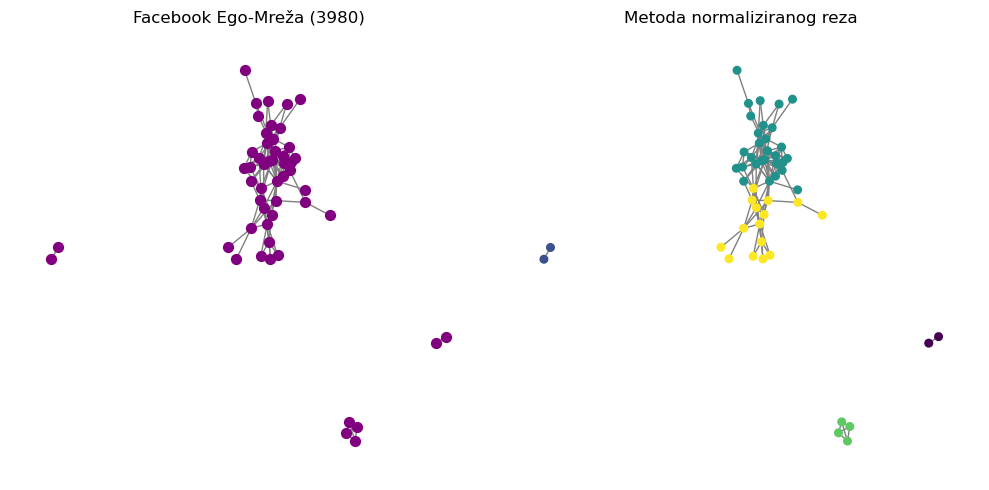

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
#sm
import SMAlgorithm
importlib.reload(SMAlgorithm)
SpectralClusteringSM = SMAlgorithm.SpectralClusteringSM


# Load graph
G = nx.Graph()
with open("facebook/facebook/3980.edges") as f:
    for line in f:
        u, v = line.strip().split()
        G.add_edge(u, v)
        
print(f"Broj vrhova, poznanika: {G.number_of_nodes()}")
print(f"Broj bridova, poznanstva: {G.number_of_edges()}")

# Convert to adjacency matrix
nodes = list(G.nodes())
node_indices = {node: i for i, node in enumerate(nodes)}
n = len(nodes)

W = np.zeros((n, n))
for u, v in G.edges():
    i, j = node_indices[u], node_indices[v]
    W[i, j] = 1
    W[j, i] = 1


# Apply spectral clustering
sc = SpectralClusteringSM(sigma_X=1.0, ncut_max=0.3)
clusters = sc.segment_network(W)
color_map = [clusters[node_indices[n]] for n in G.nodes()]

# Draw both graphs side by side
plt.figure(figsize=(10,5))
pos = nx.spring_layout(G, seed=42)

plt.subplot(1, 2, 1)
nx.draw(G, pos, with_labels=False, node_size=50, node_color='purple', edge_color='gray')
plt.title("Facebook Ego-Mreža (3980)")

plt.subplot(1, 2, 2)
nx.draw(G, pos, node_color=color_map, with_labels=False, node_size=30, cmap='viridis', edge_color='gray')
plt.title("Metoda normaliziranog reza")

plt.tight_layout()
plt.show()
